# Customer Retention

In [1]:
fig, axarr = plt.subplots(2, 1, figsize=(12, 8))import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Customer Retention Dataset.xlsx')

In [3]:
df.head(20)

1Gender of respondent 2 How old are you?   \
0                   Male         31-40 years   
1                 Female         21-30 years   
2                 Female         21-30 years   
3                   Male         21-30 years   
4                 Female         21-30 years   
5                 Female         31-40 years   
6                   Male         41-50 yaers   
7                   Male         41-50 yaers   
8                 Female  Less than 20 years   
9                 Female         31-40 years   
10                  Male         31-40 years   
11                Female         41-50 yaers   
12                Female  51 years and above   
13                Female         31-40 years   
14                Female         21-30 years   
15                Female         21-30 years   
16                  Male         31-40 years   
17                  Male         41-50 yaers   
18                Female         41-50 yaers   
19                Female         21-30 years   

   3 Which city do you shop online from?  \
0                                  Delhi   
1                                  Delhi   
2                          Greater Noida   
3                                Karnal    
4                             Bangalore    
5                                  Noida   
6                                  Delhi   
7                                  Delhi   
8                                  Solan   
9                                  Delhi   
10                             Moradabad   
11                                 Noida   
12                              Gurgaon    
13                         Greater Noida   
14                               Karnal    
15                            Bangalore    
16                                 Noida   
17                                 Delhi   
18                                 Delhi   
19                                 Solan   

    4 What is the Pin Code of where you shop online from?  \
0                                              110009       
1                                              110030       
2                                              201308       
3                                              132001       
4                                              530068       
5                                              201308       
6                                              110011       
7                                              110018       
8                                              173229       
9                                              110039       
10                                             244001       
11                                             201308       
12                                             122018       
13                                             201310       
14                                             132001       
15                                             560037       
16                                             201308       
17                                             110011       
18                                             110018       
19                                             173229       

   5 Since How Long You are Shopping Online ?  \
0                               Above 4 years   
1                               Above 4 years   
2                                   3-4 years   
3                                   3-4 years   
4                                   2-3 years   
5                               Above 4 years   
6                               Above 4 years   
7                                   3-4 years   
8                                   2-3 years   
9                            Less than 1 year   
10                              Above 4 years   
11                              Above 4 years   
12                                  2-3 years   
13                              Above 4 years   
14                           Less than 1 year   
15 

In [4]:
df.shape

(269, 71)

In [5]:
pd.set_option('display.max_rows', None)

In [6]:
df.dtypes

1Gender of respondent                                                                                                                                                                                                  object
2 How old are you?                                                                                                                                                                                                     object
3 Which city do you shop online from?                                                                                                                                                                                  object
4 What is the Pin Code of where you shop online from?                                                                                                                                                                   int64
5 Since How Long You are Shopping Online ?                                                                      

In [7]:
df.apply(lambda x: len(x.unique()))

1Gender of respondent                                                                                                                                                                                                   2
2 How old are you?                                                                                                                                                                                                      5
3 Which city do you shop online from?                                                                                                                                                                                  11
4 What is the Pin Code of where you shop online from?                                                                                                                                                                  39
5 Since How Long You are Shopping Online ?                                                                                      

In [8]:
df.isnull().sum()

1Gender of respondent                                                                                                                                                                                                  0
2 How old are you?                                                                                                                                                                                                     0
3 Which city do you shop online from?                                                                                                                                                                                  0
4 What is the Pin Code of where you shop online from?                                                                                                                                                                  0
5 Since How Long You are Shopping Online ?                                                                                          

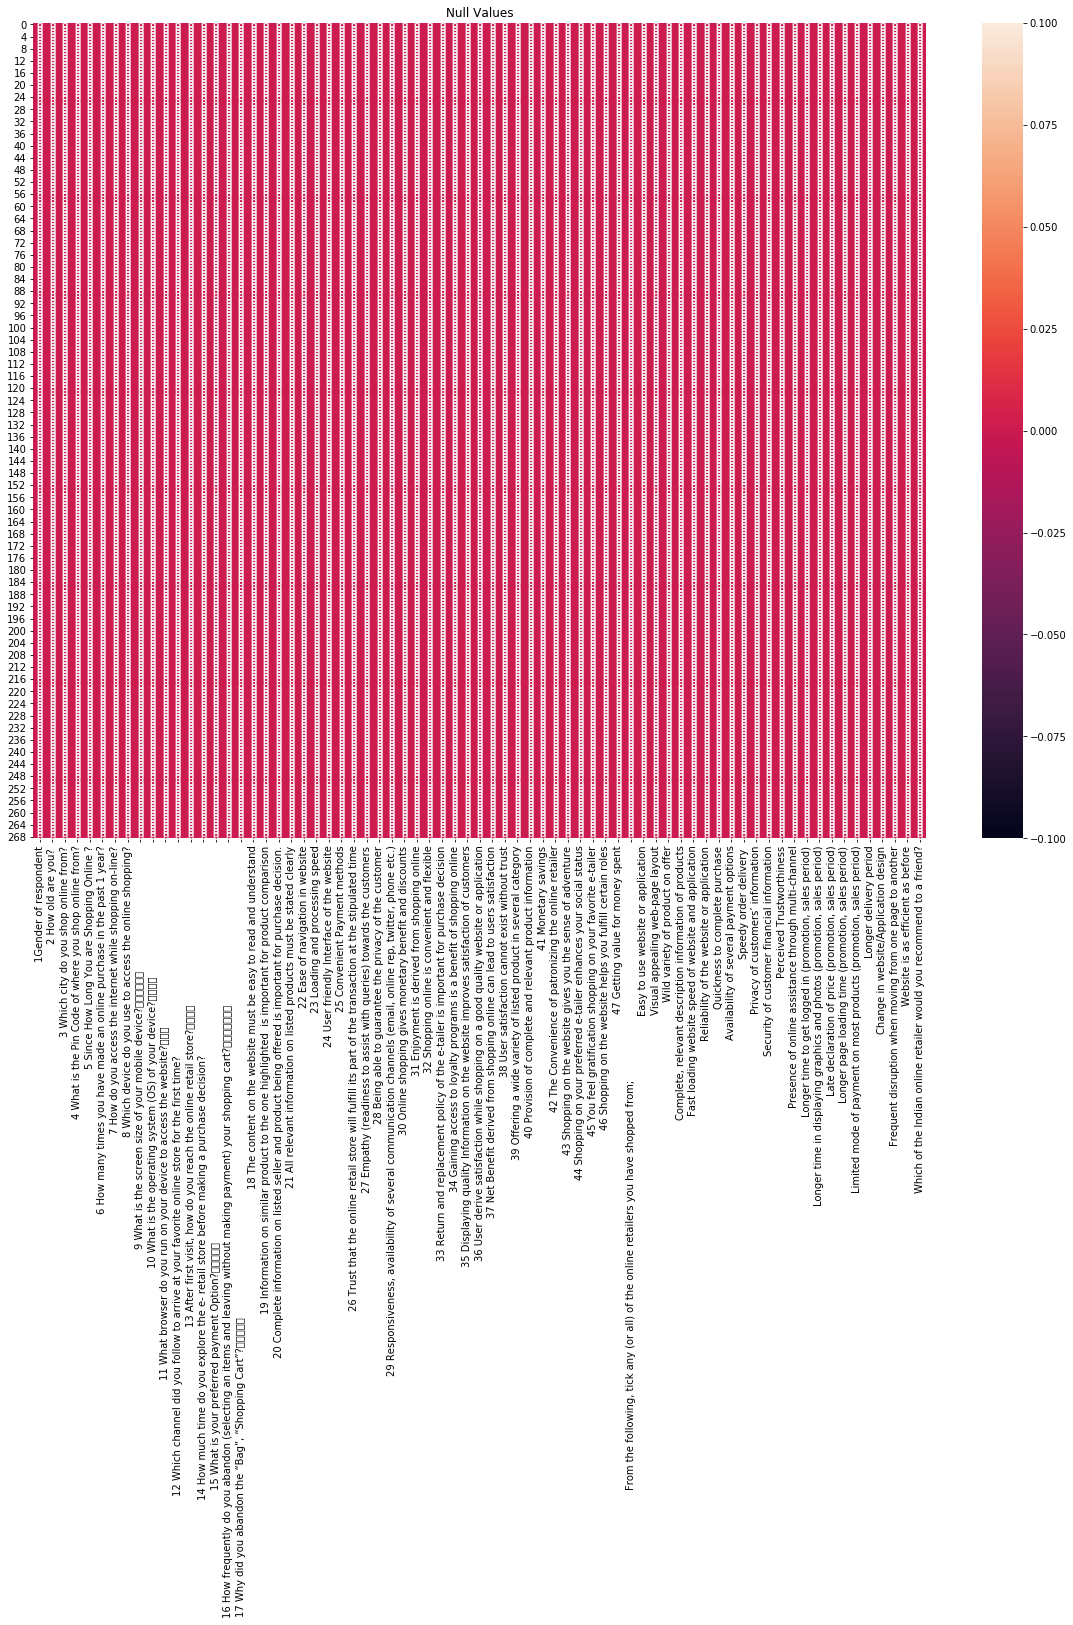

In [9]:
plt.figure(figsize = [20, 15])
sns.heatmap(df.isnull(), annot = True)                           #Visual representation of null values present in dataset
plt.title('Null Values')
plt.show()

In [10]:
df['7 How do you access the internet while shopping on-line?'].unique()

array(['Dial-up', 'Wi-Fi', 'Mobile Internet', 'Mobile internet'],
      dtype=object)

In [11]:
df['7 How do you access the internet while shopping on-line?'].replace('Mobile internet', 'Mobile Internet', inplace = True)

In [12]:
#converting Pin codes data type from int to object because that's how we will be treating it.

df['4 What is the Pin Code of where you shop online from?'] = df['4 What is the Pin Code of where you shop online from?'].astype('str')

In [13]:
df.dtypes

1Gender of respondent                                                                                                                                                                                                  object
2 How old are you?                                                                                                                                                                                                     object
3 Which city do you shop online from?                                                                                                                                                                                  object
4 What is the Pin Code of where you shop online from?                                                                                                                                                                  object
5 Since How Long You are Shopping Online ?                                                                      

In [14]:
#Many respondents have answered more than 1 store, so we will one hot encode the stores and create new columns from existing columns while deleting the original columns


string1 = 'Amazon.in'
string2 = 'Paytm.com'
string3 = 'Flipkart.com'
string4 = 'Myntra.com'
string5 = 'Snapdeal.com'

df['Shopped from Amazon.in'] = df['From the following, tick any (or all) of the online retailers you have shopped from;                                                                           '].map(lambda x: 1 if string1 in x else 0)
df['Shopped from Paytm.com'] = df['From the following, tick any (or all) of the online retailers you have shopped from;                                                                           '].map(lambda x: 1 if string2 in x else 0)
df['Shopped from Flipkart.com'] = df['From the following, tick any (or all) of the online retailers you have shopped from;                                                                           '].map(lambda x: 1 if string3 in x else 0)
df['Shopped from Myntra.com'] = df['From the following, tick any (or all) of the online retailers you have shopped from;                                                                           '].map(lambda x: 1 if string4 in x else 0)
df['Shopped from Snapdeal.com'] = df['From the following, tick any (or all) of the online retailers you have shopped from;                                                                           '].map(lambda x: 1 if string5 in x else 0)

df.drop('From the following, tick any (or all) of the online retailers you have shopped from;                                                                           ', axis = 1, inplace = True)

df['Easy to use Amazon.in'] = df['Easy to use website or application'].map(lambda x: 1 if string1 in x else 0)
df['Easy to use Paytm.com'] = df['Easy to use website or application'].map(lambda x: 1 if string2 in x else 0)
df['Easy to use Flipkart.com'] = df['Easy to use website or application'].map(lambda x: 1 if string3 in x else 0)
df['Easy to use Myntra.com'] = df['Easy to use website or application'].map(lambda x: 1 if string4 in x else 0)
df['Easy to use Snapdeal.com'] = df['Easy to use website or application'].map(lambda x: 1 if string5 in x else 0)

df.drop('Easy to use website or application', axis = 1, inplace = True)

df['Visual appealing web-page layout Amazon.in'] = df['Visual appealing web-page layout'].map(lambda x: 1 if string1 in x else 0)
df['Visual appealing web-page layout Paytm.com'] = df['Visual appealing web-page layout'].map(lambda x: 1 if string2 in x else 0)
df['Visual appealing web-page layout Flipkart.com'] = df['Visual appealing web-page layout'].map(lambda x: 1 if string3 in x else 0)
df['Visual appealing web-page layout Myntra.com'] = df['Visual appealing web-page layout'].map(lambda x: 1 if string4 in x else 0)
df['Visual appealing web-page layout Snapdeal.com'] = df['Visual appealing web-page layout'].map(lambda x: 1 if string5 in x else 0)

df.drop('Visual appealing web-page layout', axis = 1, inplace = True)

df['Wild variety of product on offer Amazon.in'] = df['Wild variety of product on offer'].map(lambda x: 1 if string1 in x else 0)
df['Wild variety of product on offer Paytm.com'] = df['Wild variety of product on offer'].map(lambda x: 1 if string2 in x else 0)
df['Wild variety of product on offer Flipkart.com'] = df['Wild variety of product on offer'].map(lambda x: 1 if string3 in x else 0)
df['Wild variety of product on offer Myntra.com'] = df['Wild variety of product on offer'].map(lambda x: 1 if string4 in x else 0)
df['Wild variety of product on offer Snapdeal.com'] = df['Wild variety of product on offer'].map(lambda x: 1 if string5 in x else 0)

df.drop('Wild variety of product on offer', axis = 1, inplace = True)

df['Complete, relevant description information of products Amazon.in'] = df['Complete, relevant description information of products'].map(lambda x: 1 if string1 in x else 0)
df['Complete, relevant description information of products Paytm.com'] = df['Complete, relevant description information of products'].map(lambda x: 1 if string2 in x else 0)
df['Complete, relevant description information of products Flipkart.com'] = df['Complete, relevant description information of products'].map(lambda x: 1 if string3 in x else 0)
df['Complete, relevant description information of products Myntra.com'] = df['Complete, relevant description information of products'].map(lambda x: 1 if string4 in x else 0)
df['Complete, relevant description information of products Snapdeal.com'] = df['Complete, relevant description information of products'].map(lambda x: 1 if string5 in x else 0)

df.drop('Complete, relevant description information of products', axis = 1, inplace = True)

df['Fast loading website speed of website and application Amazon.in'] = df['Fast loading website speed of website and application'].map(lambda x: 1 if string1 in x else 0)
df['Fast loading website speed of website and application Paytm.com'] = df['Fast loading website speed of website and application'].map(lambda x: 1 if string2 in x else 0)
df['Fast loading website speed of website and application Flipkart.com'] = df['Fast loading website speed of website and application'].map(lambda x: 1 if string3 in x else 0)
df['Fast loading website speed of website and application Myntra.com'] = df['Fast loading website speed of website and application'].map(lambda x: 1 if string4 in x else 0)
df['Fast loading website speed of website and application Snapdeal.com'] = df['Fast loading website speed of website and application'].map(lambda x: 1 if string5 in x else 0)

df.drop('Fast loading website speed of website and application', axis = 1, inplace = True)

df['Reliability of the website or application Amazon.in'] = df['Reliability of the website or application'].map(lambda x: 1 if string1 in x else 0)
df['Reliability of the website or application Paytm.com'] = df['Reliability of the website or application'].map(lambda x: 1 if string2 in x else 0)
df['Reliability of the website or application Flipkart.com'] = df['Reliability of the website or application'].map(lambda x: 1 if string3 in x else 0)
df['Reliability of the website or application Myntra.com'] = df['Reliability of the website or application'].map(lambda x: 1 if string4 in x else 0)
df['Reliability of the website or application Snapdeal.com'] = df['Reliability of the website or application'].map(lambda x: 1 if string5 in x else 0)

df.drop('Reliability of the website or application', axis = 1, inplace = True)

df['Quickness to complete purchase Amazon.in'] = df['Quickness to complete purchase'].map(lambda x: 1 if string1 in x else 0)
df['Quickness to complete purchase Paytm.com'] = df['Quickness to complete purchase'].map(lambda x: 1 if string2 in x else 0)
df['Quickness to complete purchase Flipkart.com'] = df['Quickness to complete purchase'].map(lambda x: 1 if string3 in x else 0)
df['Quickness to complete purchase Myntra.com'] = df['Quickness to complete purchase'].map(lambda x: 1 if string4 in x else 0)
df['Quickness to complete purchase Snapdeal.com'] = df['Quickness to complete purchase'].map(lambda x: 1 if string5 in x else 0)

df.drop('Quickness to complete purchase', axis = 1, inplace = True)

df['Availability of several payment options Amazon.in'] = df['Availability of several payment options'].map(lambda x: 1 if string1 in x else 0)
df['Availability of several payment options Paytm.com'] = df['Availability of several payment options'].map(lambda x: 1 if string2 in x else 0)
df['Availability of several payment options Flipkart.com'] = df['Availability of several payment options'].map(lambda x: 1 if string3 in x else 0)
df['Availability of several payment options Myntra.com'] = df['Availability of several payment options'].map(lambda x: 1 if string4 in x else 0)
df['Availability of several payment options Snapdeal.com'] = df['Availability of several payment options'].map(lambda x: 1 if string5 in x else 0)

df.drop('Availability of several payment options', axis = 1, inplace = True)

df['Speedy order delivery Amazon.in'] = df['Speedy order delivery '].map(lambda x: 1 if string1 in x else 0)
df['Speedy order delivery Paytm.com'] = df['Speedy order delivery '].map(lambda x: 1 if string2 in x else 0)
df['Speedy order delivery Flipkart.com'] = df['Speedy order delivery '].map(lambda x: 1 if string3 in x else 0)
df['Speedy order delivery Myntra.com'] = df['Speedy order delivery '].map(lambda x: 1 if string4 in x else 0)
df['Speedy order delivery Snapdeal.com'] = df['Speedy order delivery '].map(lambda x: 1 if string5 in x else 0)

df.drop('Speedy order delivery ', axis = 1, inplace = True)

df['Privacy of customers’ information Amazon.in'] = df['Privacy of customers’ information'].map(lambda x: 1 if string1 in x else 0)
df['Privacy of customers’ information Paytm.com'] = df['Privacy of customers’ information'].map(lambda x: 1 if string2 in x else 0)
df['Privacy of customers’ information Flipkart.com'] = df['Privacy of customers’ information'].map(lambda x: 1 if string3 in x else 0)
df['Privacy of customers’ information Myntra.com'] = df['Privacy of customers’ information'].map(lambda x: 1 if string4 in x else 0)
df['Privacy of customers’ information Snapdeal.com'] = df['Privacy of customers’ information'].map(lambda x: 1 if string5 in x else 0)

df.drop('Privacy of customers’ information', axis = 1, inplace = True)

df['Security of customer financial information Amazon.in'] = df['Security of customer financial information'].map(lambda x: 1 if string1 in x else 0)
df['Security of customer financial information Paytm.com'] = df['Security of customer financial information'].map(lambda x: 1 if string2 in x else 0)
df['Security of customer financial information Flipkart.com'] = df['Security of customer financial information'].map(lambda x: 1 if string3 in x else 0)
df['Security of customer financial information Myntra.com'] = df['Security of customer financial information'].map(lambda x: 1 if string4 in x else 0)
df['Security of customer financial information Snapdeal.com'] = df['Security of customer financial information'].map(lambda x: 1 if string5 in x else 0)

df.drop('Security of customer financial information', axis = 1, inplace = True)

df['Perceived Trustworthiness Amazon.in'] = df['Perceived Trustworthiness'].map(lambda x: 1 if string1 in x else 0)
df['Perceived Trustworthiness Paytm.com'] = df['Perceived Trustworthiness'].map(lambda x: 1 if string2 in x else 0)
df['Perceived Trustworthiness Flipkart.com'] = df['Perceived Trustworthiness'].map(lambda x: 1 if string3 in x else 0)
df['Perceived Trustworthiness Myntra.com'] = df['Perceived Trustworthiness'].map(lambda x: 1 if string4 in x else 0)
df['Perceived Trustworthiness Snapdeal.com'] = df['Perceived Trustworthiness'].map(lambda x: 1 if string5 in x else 0)
df.drop('Perceived Trustworthiness', axis = 1, inplace = True)

df['Presence of online assistance through multi-channel Amazon.in'] = df['Presence of online assistance through multi-channel'].map(lambda x: 1 if string1 in x else 0)
df['Presence of online assistance through multi-channel Paytm.com'] = df['Presence of online assistance through multi-channel'].map(lambda x: 1 if string2 in x else 0)
df['Presence of online assistance through multi-channel Flipkart.com'] = df['Presence of online assistance through multi-channel'].map(lambda x: 1 if string3 in x else 0)
df['Presence of online assistance through multi-channel Myntra.com'] = df['Presence of online assistance through multi-channel'].map(lambda x: 1 if string4 in x else 0)
df['Presence of online assistance through multi-channel Snapdeal.com'] = df['Presence of online assistance through multi-channel'].map(lambda x: 1 if string5 in x else 0)

df.drop('Presence of online assistance through multi-channel', axis = 1, inplace = True)

df['Longer time to get logged in (promotion, sales period) Amazon.in'] = df['Longer time to get logged in (promotion, sales period)'].map(lambda x: 1 if string1 in x else 0)
df['Longer time to get logged in (promotion, sales period) Paytm.com'] = df['Longer time to get logged in (promotion, sales period)'].map(lambda x: 1 if string2 in x else 0)
df['Longer time to get logged in (promotion, sales period) Flipkart.com'] = df['Longer time to get logged in (promotion, sales period)'].map(lambda x: 1 if string3 in x else 0)
df['Longer time to get logged in (promotion, sales period) Myntra.com'] = df['Longer time to get logged in (promotion, sales period)'].map(lambda x: 1 if string4 in x else 0)
df['Longer time to get logged in (promotion, sales period) Snapdeal.com'] = df['Longer time to get logged in (promotion, sales period)'].map(lambda x: 1 if string5 in x else 0)

df.drop('Longer time to get logged in (promotion, sales period)', axis = 1, inplace = True)

df['Longer time in displaying graphics and photos (promotion, sales period) Amazon.in'] = df['Longer time in displaying graphics and photos (promotion, sales period)'].map(lambda x: 1 if string1 in x else 0)
df['Longer time in displaying graphics and photos (promotion, sales period) Paytm.com'] = df['Longer time in displaying graphics and photos (promotion, sales period)'].map(lambda x: 1 if string2 in x else 0)
df['Longer time in displaying graphics and photos (promotion, sales period) Flipkart.com'] = df['Longer time in displaying graphics and photos (promotion, sales period)'].map(lambda x: 1 if string3 in x else 0)
df['Longer time in displaying graphics and photos (promotion, sales period) Myntra.com'] = df['Longer time in displaying graphics and photos (promotion, sales period)'].map(lambda x: 1 if string4 in x else 0)
df['Longer time in displaying graphics and photos (promotion, sales period) Snapdeal.com'] = df['Longer time in displaying graphics and photos (promotion, sales period)'].map(lambda x: 1 if string5 in x else 0)

df.drop('Longer time in displaying graphics and photos (promotion, sales period)', axis = 1, inplace = True)

df['Late declaration of price (promotion, sales period) Amazon.in'] = df['Late declaration of price (promotion, sales period)'].map(lambda x: 1 if string1 in x else 0)
df['Late declaration of price (promotion, sales period) Paytm.com'] = df['Late declaration of price (promotion, sales period)'].map(lambda x: 1 if string2 in x else 0)
df['Late declaration of price (promotion, sales period) Flipkart.com'] = df['Late declaration of price (promotion, sales period)'].map(lambda x: 1 if string3 in x else 0)
df['Late declaration of price (promotion, sales period) Myntra.com'] = df['Late declaration of price (promotion, sales period)'].map(lambda x: 1 if string4 in x else 0)
df['Late declaration of price (promotion, sales period) Snapdeal.com'] = df['Late declaration of price (promotion, sales period)'].map(lambda x: 1 if string5 in x else 0)

df.drop('Late declaration of price (promotion, sales period)', axis = 1, inplace = True)

df['Longer page loading time (promotion, sales period) Amazon.in'] = df['Longer page loading time (promotion, sales period)'].map(lambda x: 1 if string1 in x else 0)
df['Longer page loading time (promotion, sales period) Paytm.com'] = df['Longer page loading time (promotion, sales period)'].map(lambda x: 1 if string2 in x else 0)
df['Longer page loading time (promotion, sales period) Flipkart.com'] = df['Longer page loading time (promotion, sales period)'].map(lambda x: 1 if string3 in x else 0)
df['Longer page loading time (promotion, sales period) Myntra.com'] = df['Longer page loading time (promotion, sales period)'].map(lambda x: 1 if string4 in x else 0)
df['Longer page loading time (promotion, sales period) Snapdeal.com'] = df['Longer page loading time (promotion, sales period)'].map(lambda x: 1 if string5 in x else 0)

df.drop('Longer page loading time (promotion, sales period)', axis = 1, inplace = True)

df['Limited mode of payment on most products (promotion, sales period) Amazon.in'] = df['Limited mode of payment on most products (promotion, sales period)'].map(lambda x: 1 if string1 in x else 0)
df['Limited mode of payment on most products (promotion, sales period) Paytm.com'] = df['Limited mode of payment on most products (promotion, sales period)'].map(lambda x: 1 if string2 in x else 0)
df['Limited mode of payment on most products (promotion, sales period) Flipkart.com'] = df['Limited mode of payment on most products (promotion, sales period)'].map(lambda x: 1 if string3 in x else 0)
df['Limited mode of payment on most products (promotion, sales period) Myntra.com'] = df['Limited mode of payment on most products (promotion, sales period)'].map(lambda x: 1 if string4 in x else 0)
df['Limited mode of payment on most products (promotion, sales period) Snapdeal.com'] = df['Limited mode of payment on most products (promotion, sales period)'].map(lambda x: 1 if string5 in x else 0)

df.drop('Limited mode of payment on most products (promotion, sales period)', axis = 1, inplace = True)

df['Longer delivery period Amazon.in'] = df['Longer delivery period'].map(lambda x: 1 if string1 in x else 0)
df['Longer delivery period Paytm.com'] = df['Longer delivery period'].map(lambda x: 1 if string2 in x else 0)
df['Longer delivery period Flipkart.com'] = df['Longer delivery period'].map(lambda x: 1 if string3 in x else 0)
df['Longer delivery period Myntra.com'] = df['Longer delivery period'].map(lambda x: 1 if string4 in x else 0)
df['Longer delivery period Snapdeal.com'] = df['Longer delivery period'].map(lambda x: 1 if string5 in x else 0)

df.drop('Longer delivery period', axis = 1, inplace = True)

df['Change in website/Application design Amazon.in'] = df['Change in website/Application design'].map(lambda x: 1 if string1 in x else 0)
df['Change in website/Application design Paytm.com'] = df['Change in website/Application design'].map(lambda x: 1 if string2 in x else 0)
df['Change in website/Application design Flipkart.com'] = df['Change in website/Application design'].map(lambda x: 1 if string3 in x else 0)
df['Change in website/Application design Myntra.com'] = df['Change in website/Application design'].map(lambda x: 1 if string4 in x else 0)
df['Change in website/Application design Snapdeal.com'] = df['Change in website/Application design'].map(lambda x: 1 if string5 in x else 0)

df.drop('Change in website/Application design', axis = 1, inplace = True)

df['Frequent disruption when moving from one page to another Amazon.in'] = df['Frequent disruption when moving from one page to another'].map(lambda x: 1 if string1 in x else 0)
df['Frequent disruption when moving from one page to another Paytm.com'] = df['Frequent disruption when moving from one page to another'].map(lambda x: 1 if string2 in x else 0)
df['Frequent disruption when moving from one page to another Flipkart.com'] = df['Frequent disruption when moving from one page to another'].map(lambda x: 1 if string3 in x else 0)
df['Frequent disruption when moving from one page to another Myntra.com'] = df['Frequent disruption when moving from one page to another'].map(lambda x: 1 if string4 in x else 0)
df['Frequent disruption when moving from one page to another Snapdeal.com'] = df['Frequent disruption when moving from one page to another'].map(lambda x: 1 if string5 in x else 0)

df.drop('Frequent disruption when moving from one page to another', axis = 1, inplace = True)

df['Website is as efficient as before Amazon.in'] = df['Website is as efficient as before'].map(lambda x: 1 if string1 in x else 0)
df['Website is as efficient as before Paytm.com'] = df['Website is as efficient as before'].map(lambda x: 1 if string2 in x else 0)
df['Website is as efficient as before Flipkart.com'] = df['Website is as efficient as before'].map(lambda x: 1 if string3 in x else 0)
df['Website is as efficient as before Myntra.com'] = df['Website is as efficient as before'].map(lambda x: 1 if string4 in x else 0)
df['Website is as efficient as before Snapdeal.com'] = df['Website is as efficient as before'].map(lambda x: 1 if string5 in x else 0)

df.drop('Website is as efficient as before', axis = 1, inplace = True)

df['Would you recommend Amazon.in'] = df['Which of the Indian online retailer would you recommend to a friend?'].map(lambda x: 1 if string1 in x else 0)
df['Would you recommend Paytm.com'] = df['Which of the Indian online retailer would you recommend to a friend?'].map(lambda x: 1 if string2 in x else 0)
df['Would you recommend Flipkart.com'] = df['Which of the Indian online retailer would you recommend to a friend?'].map(lambda x: 1 if string3 in x else 0)
df['Would you recommend Myntra.com'] = df['Which of the Indian online retailer would you recommend to a friend?'].map(lambda x: 1 if string4 in x else 0)
df['Would you recommend Snapdeal.com'] = df['Which of the Indian online retailer would you recommend to a friend?'].map(lambda x: 1 if string5 in x else 0)

df.drop('Which of the Indian online retailer would you recommend to a friend?', axis = 1, inplace = True)



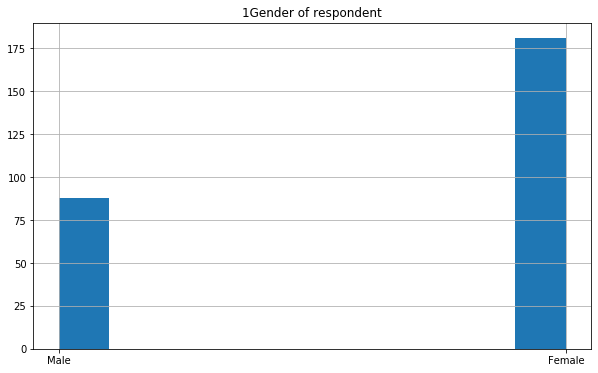

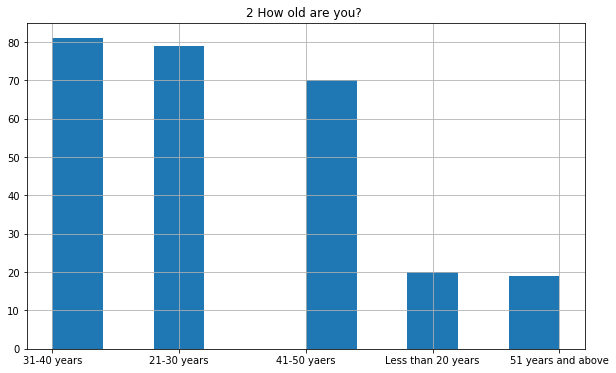

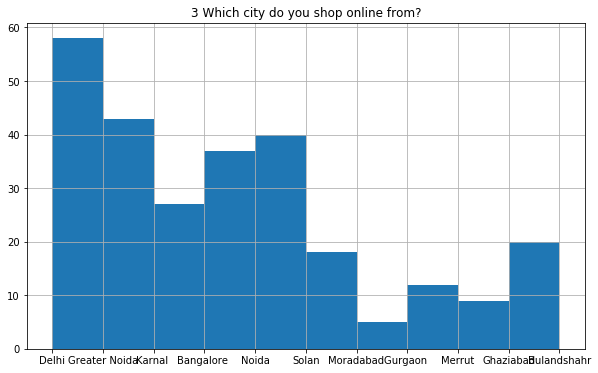

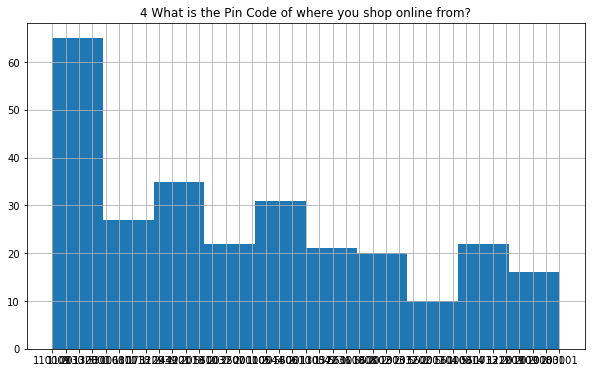

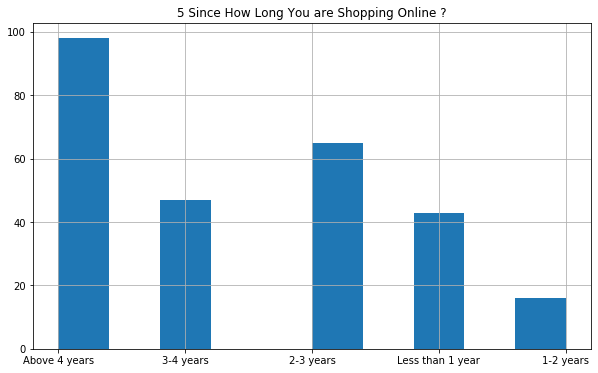

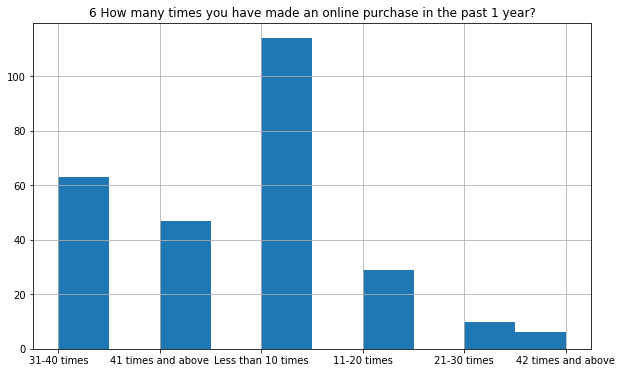

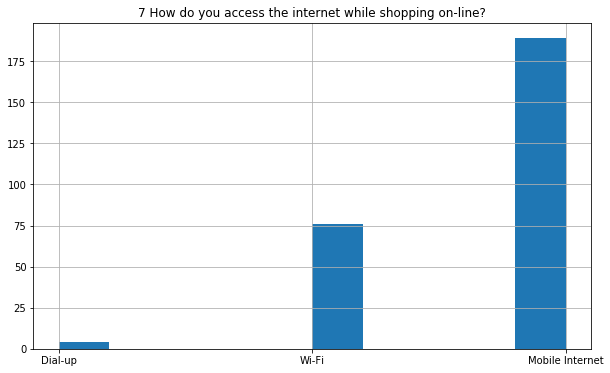

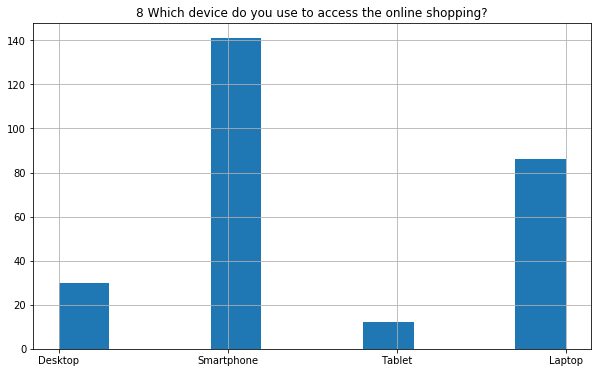

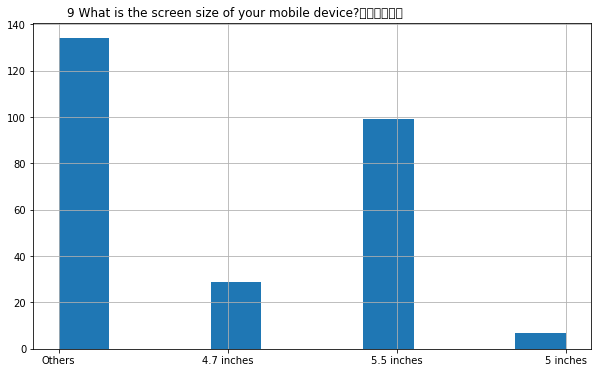

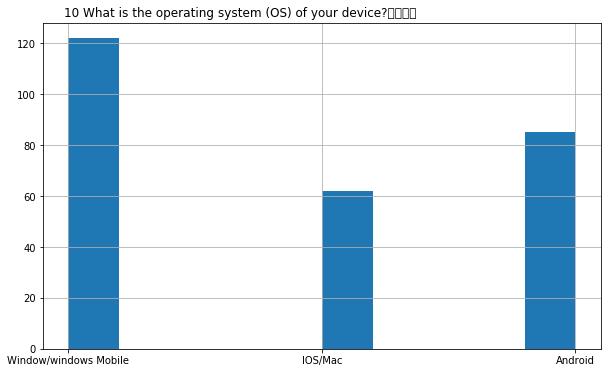

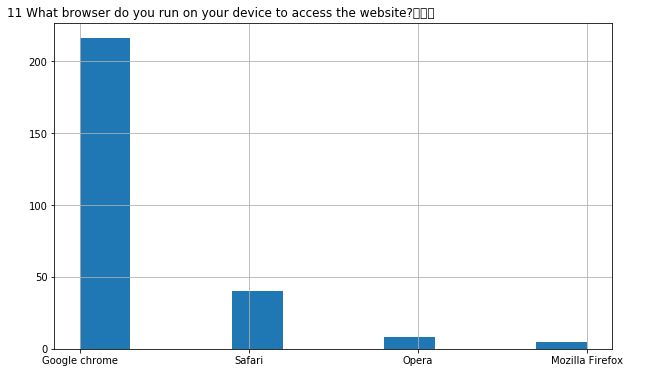

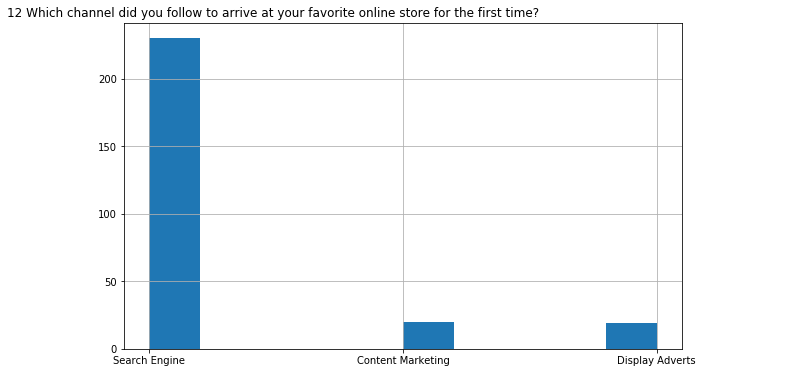

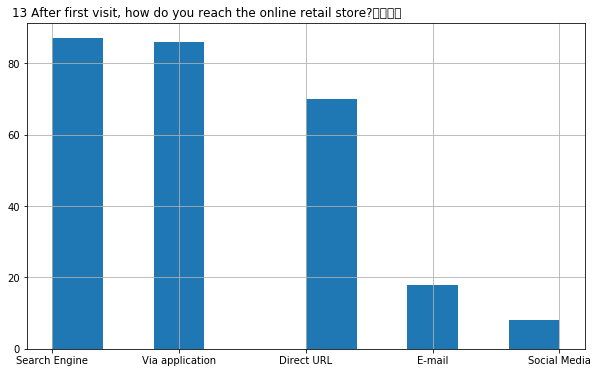

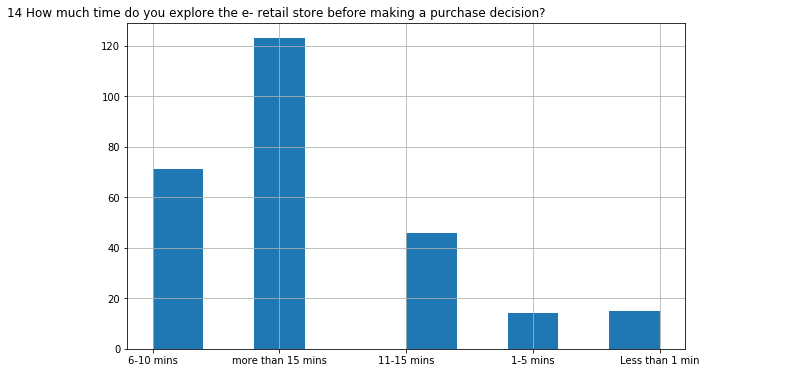

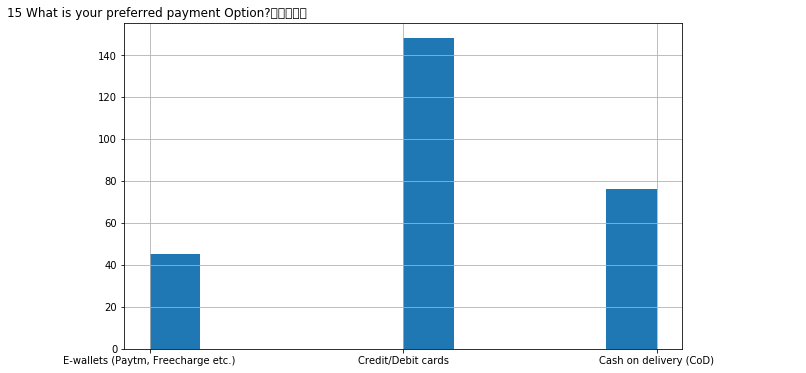

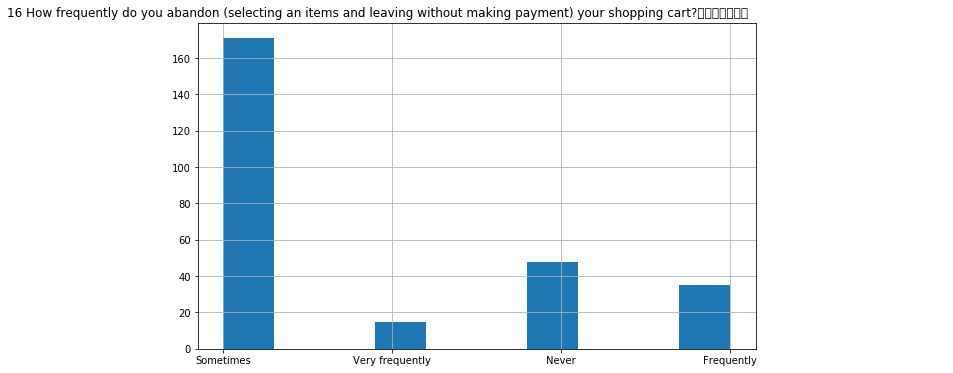

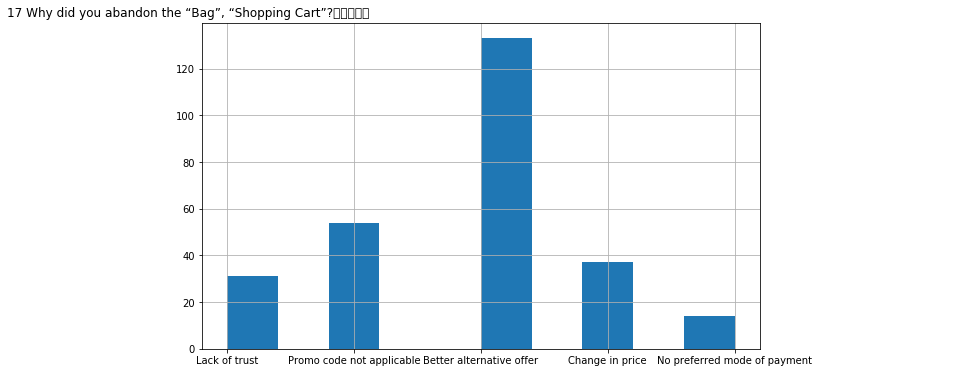

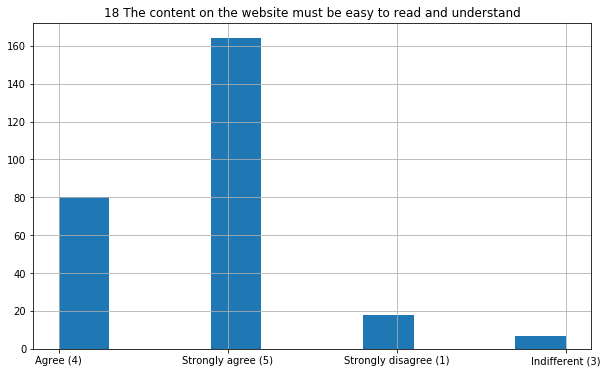

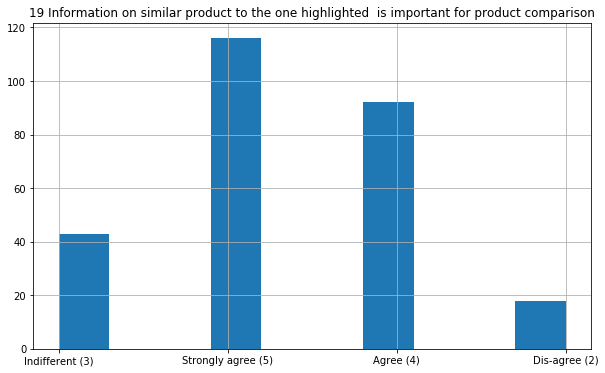

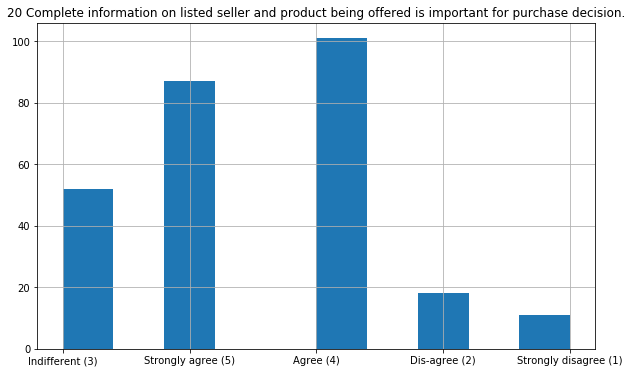

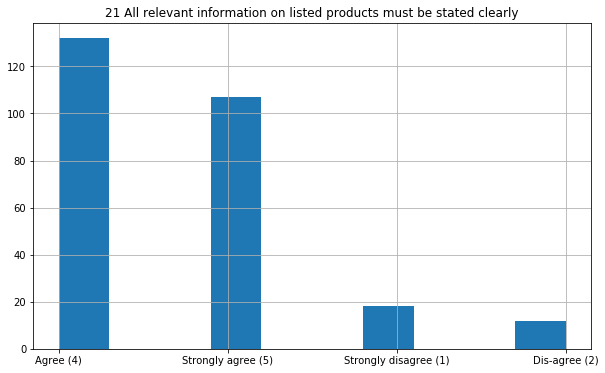

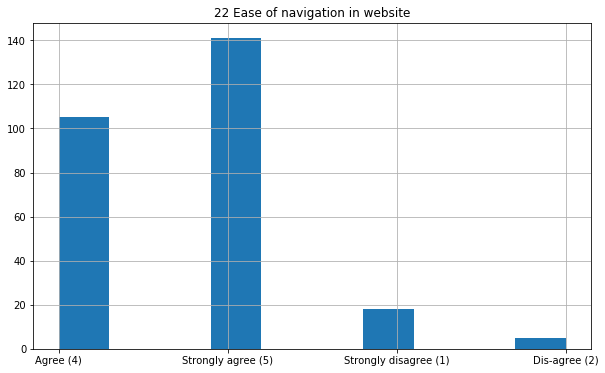

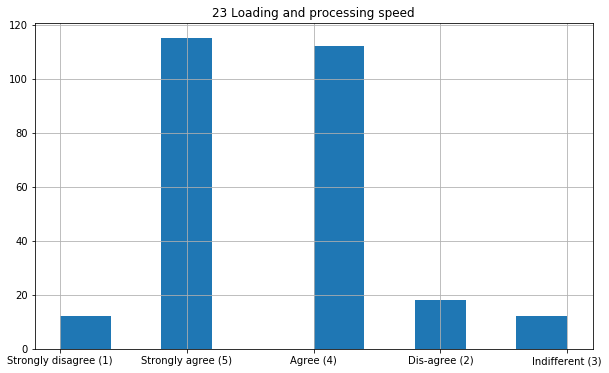

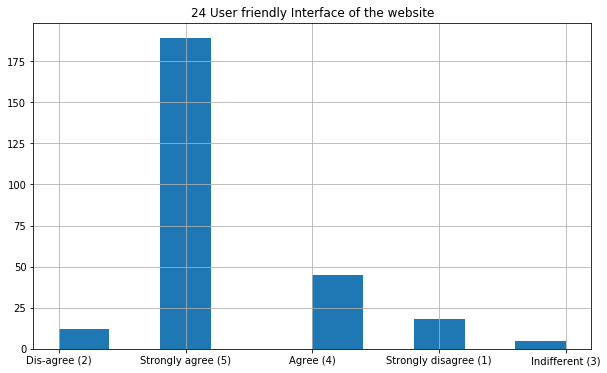

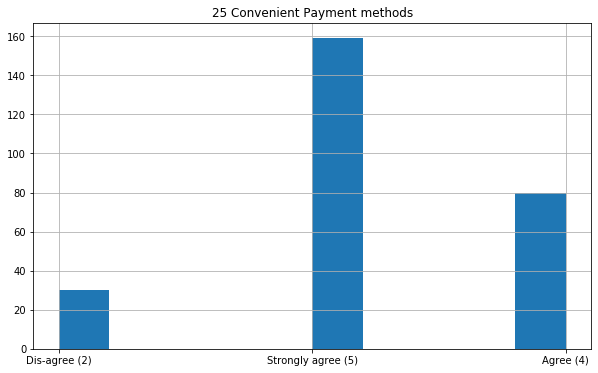

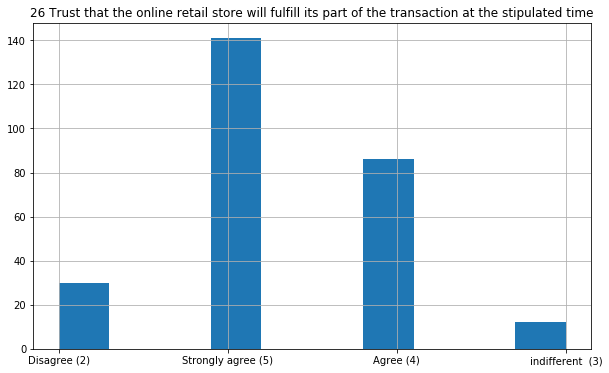

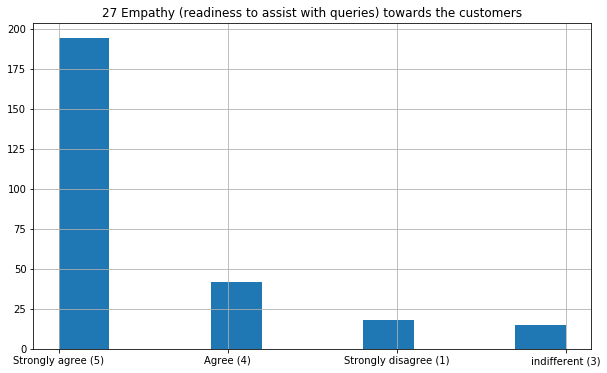

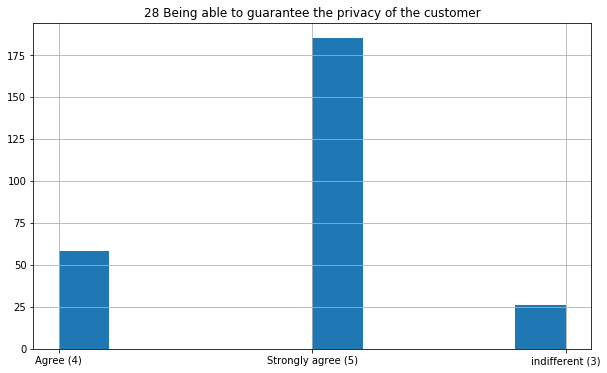

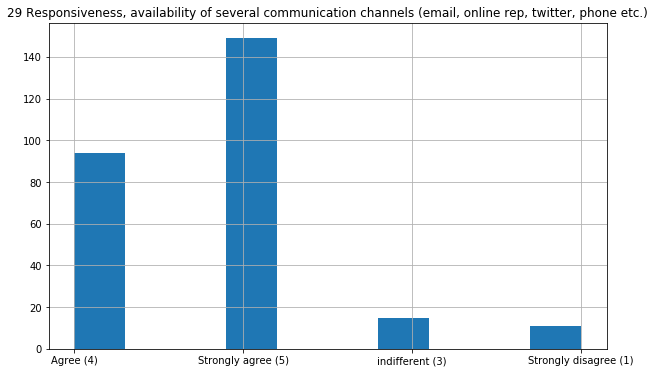

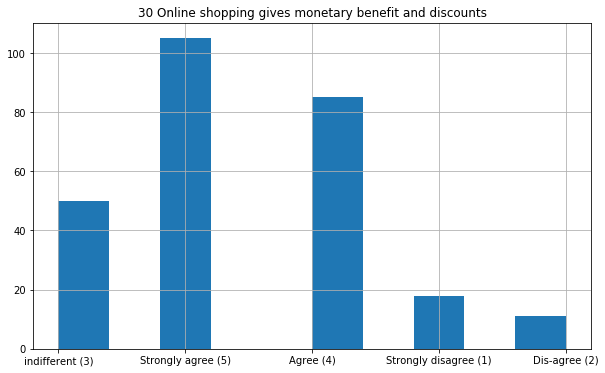

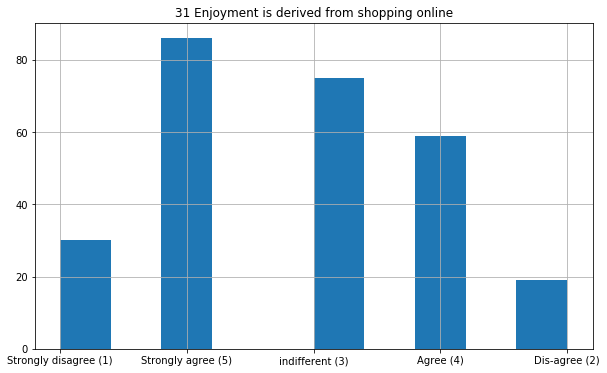

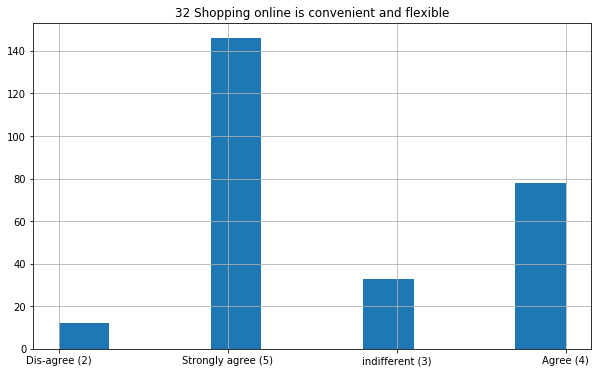

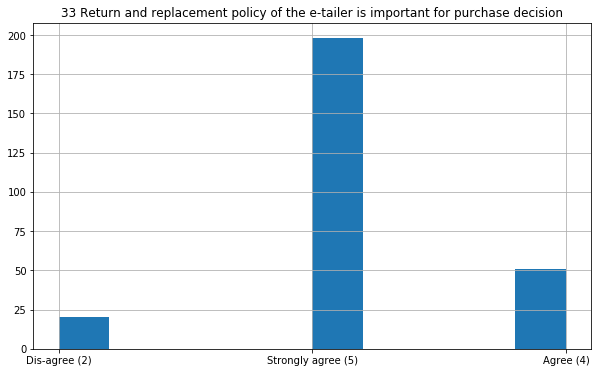

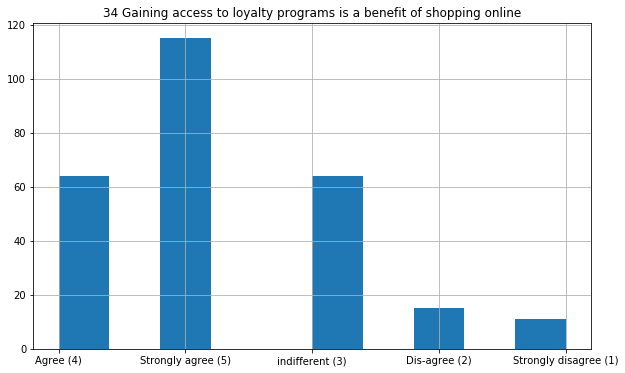

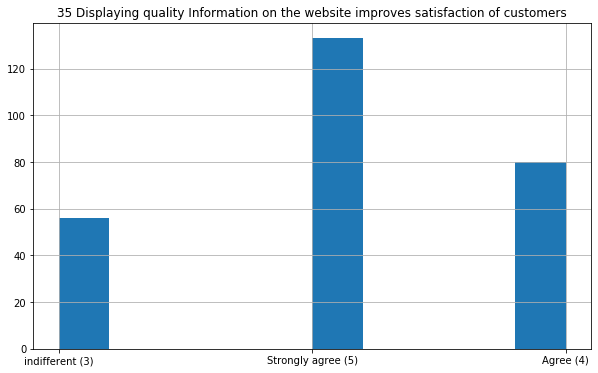

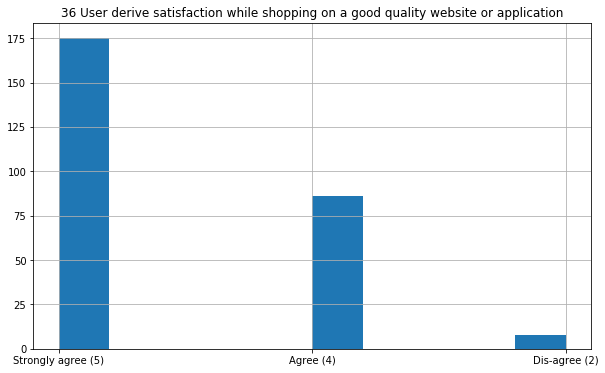

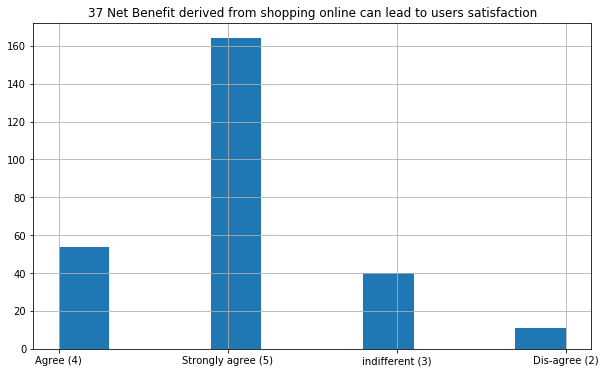

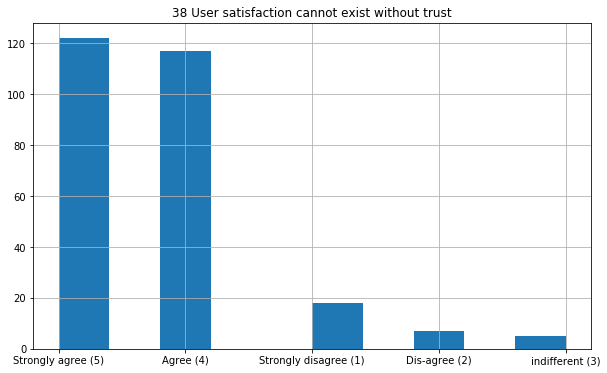

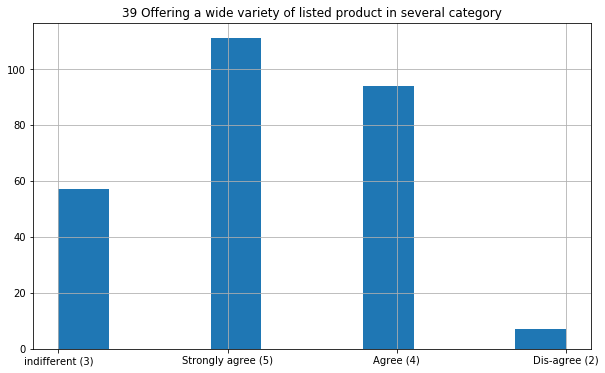

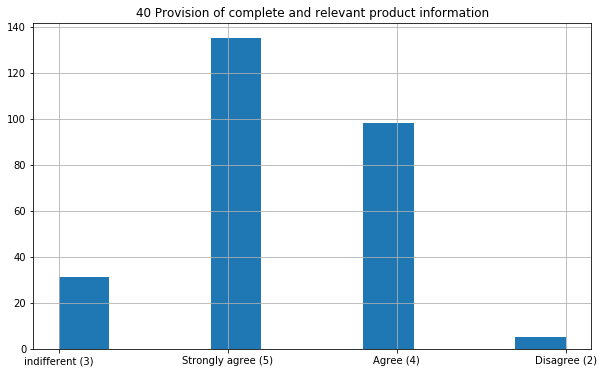

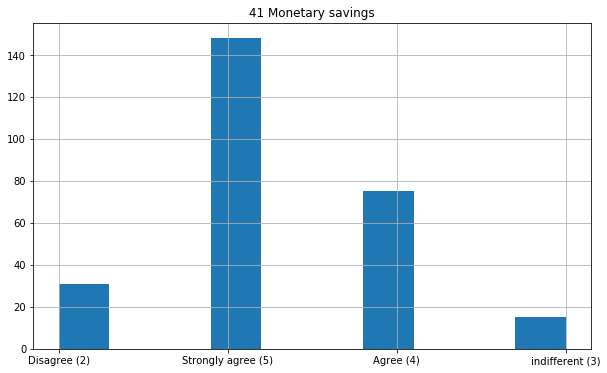

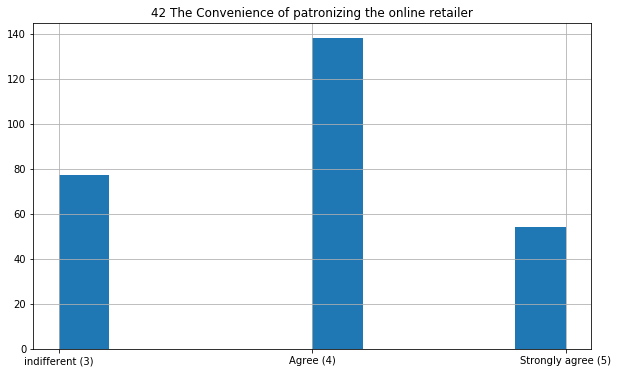

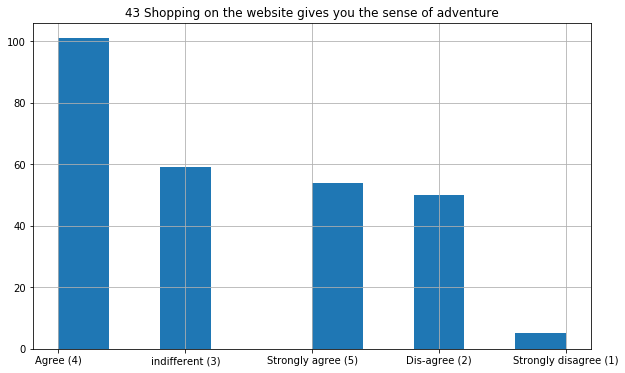

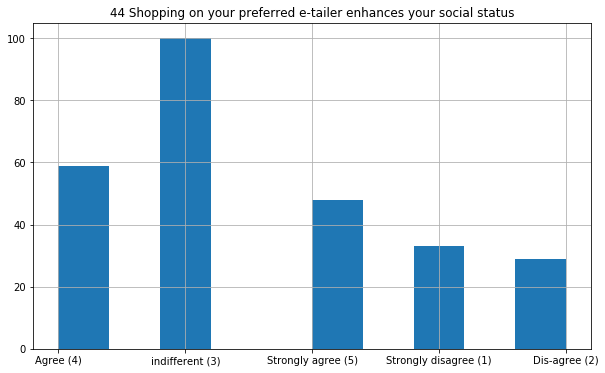

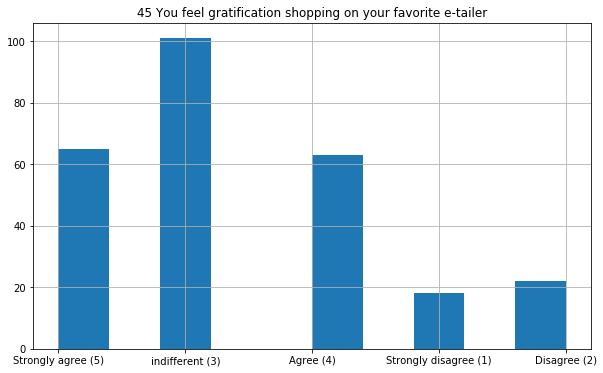

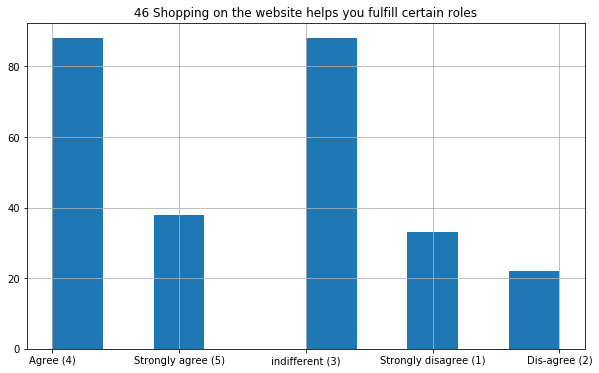

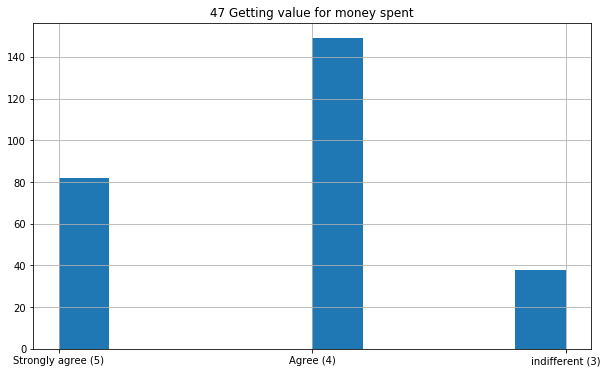

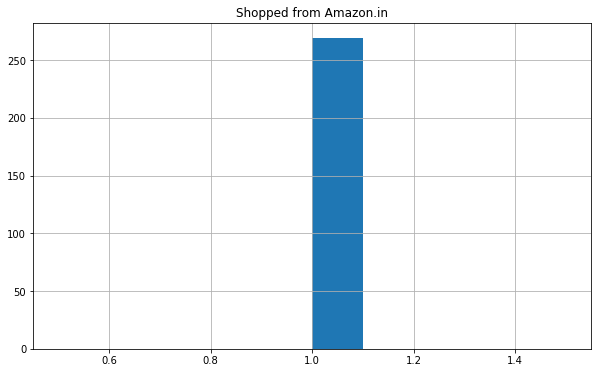

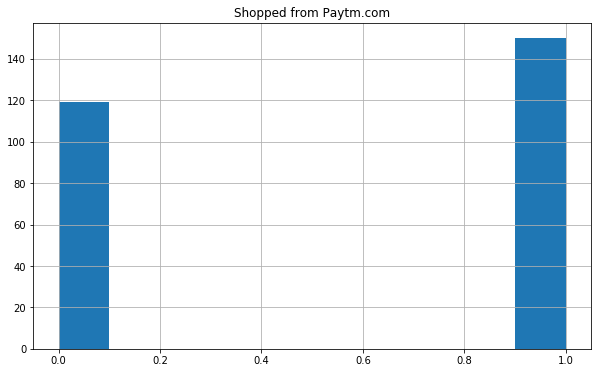

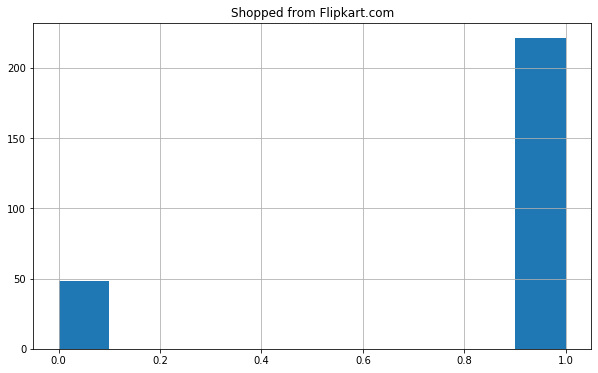

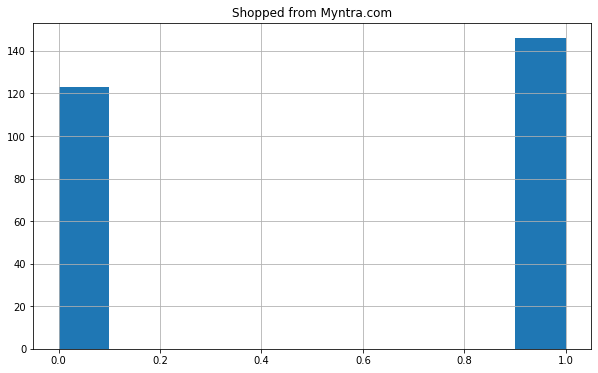

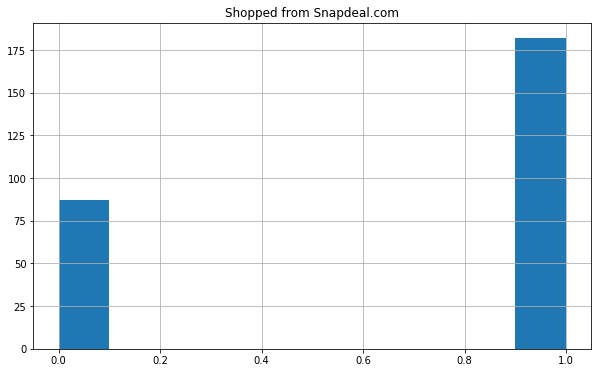

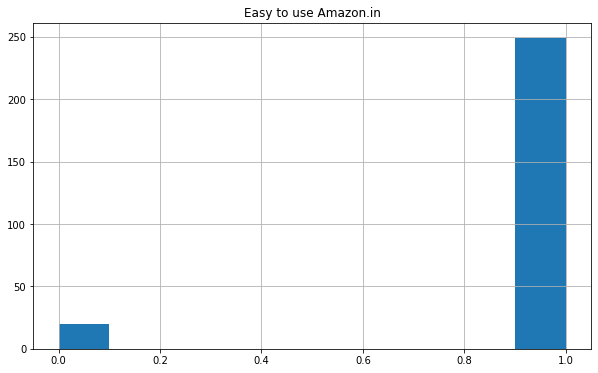

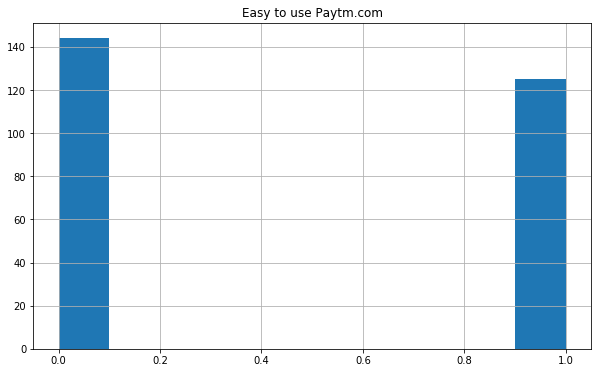

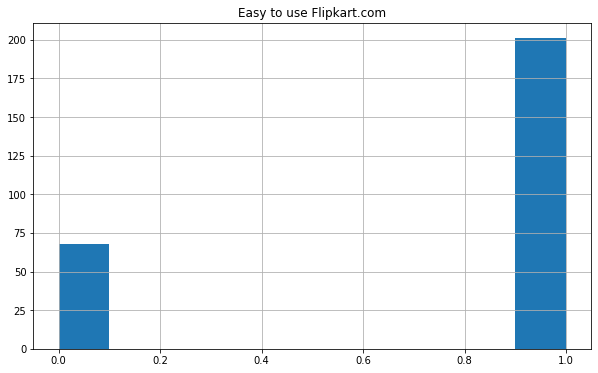

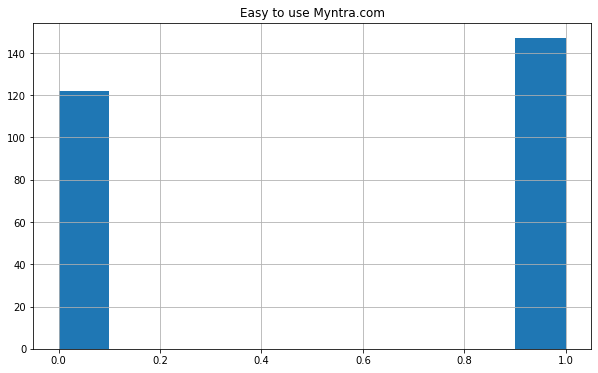

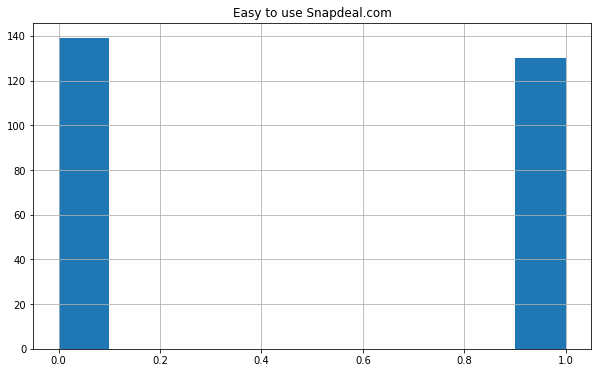

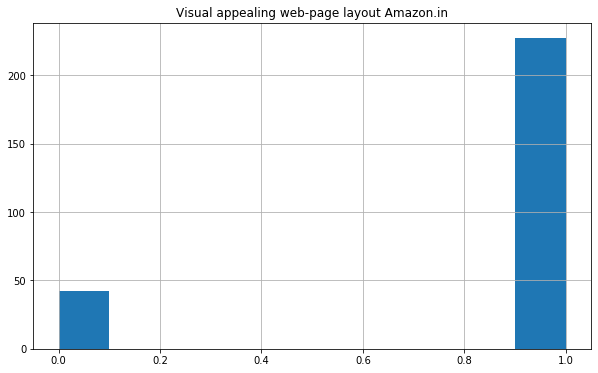

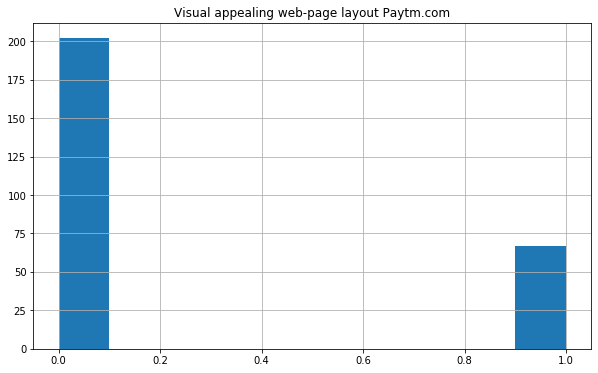

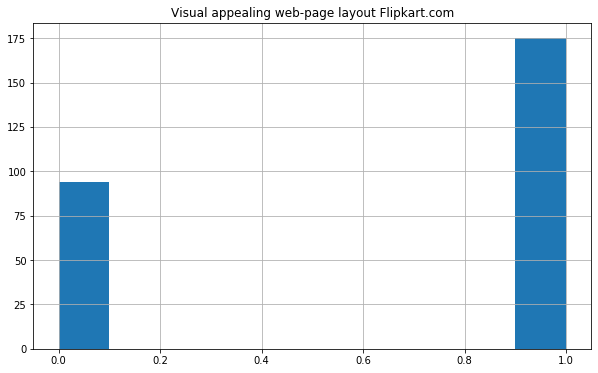

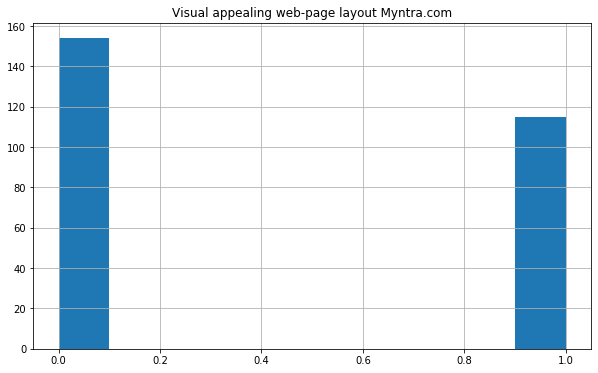

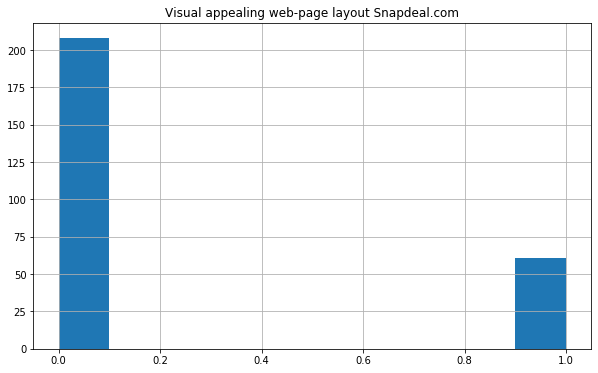

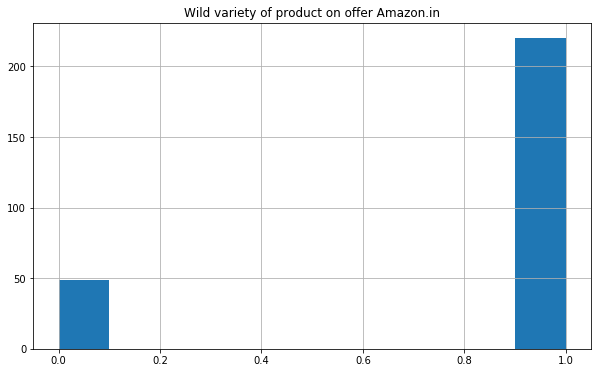

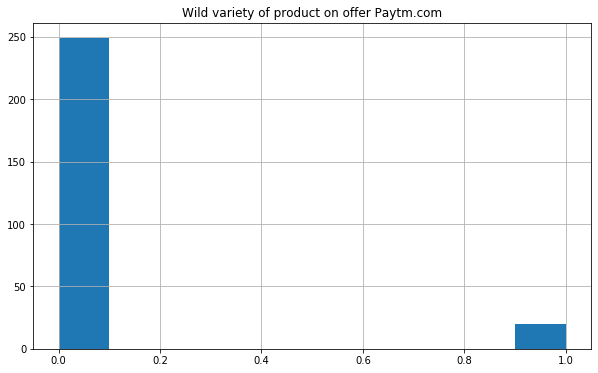

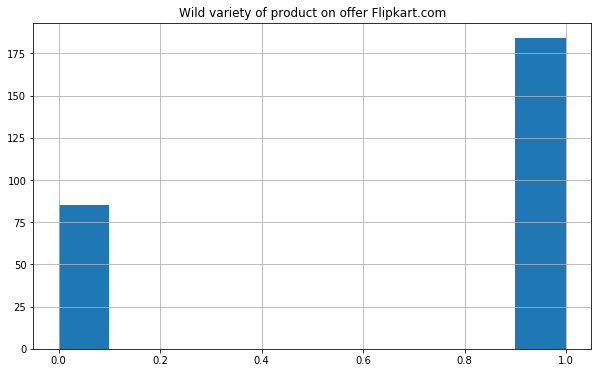

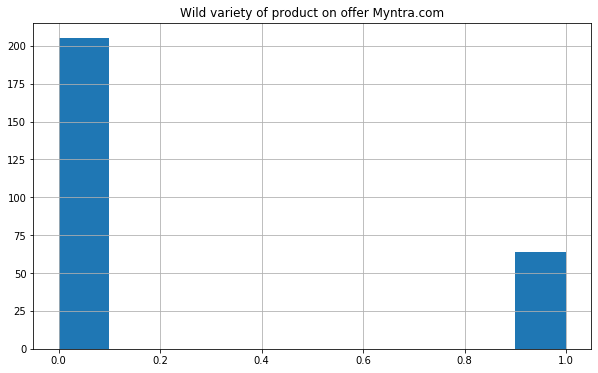

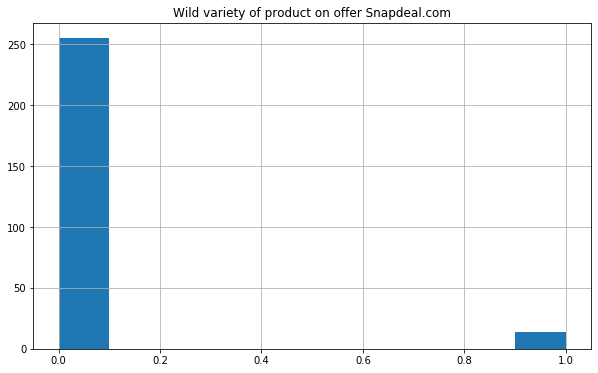

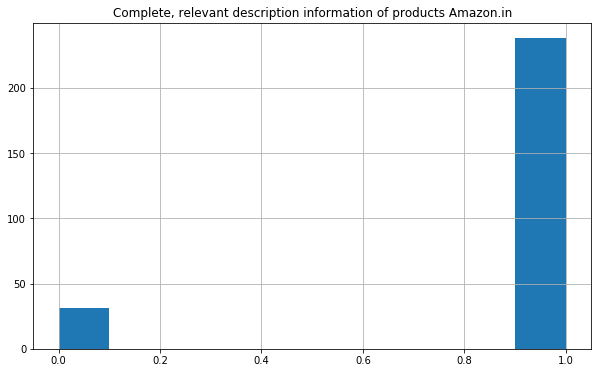

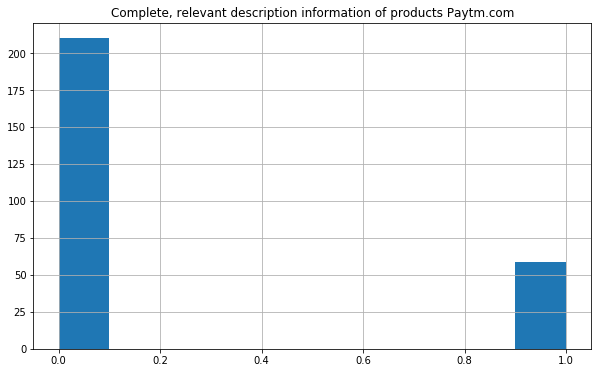

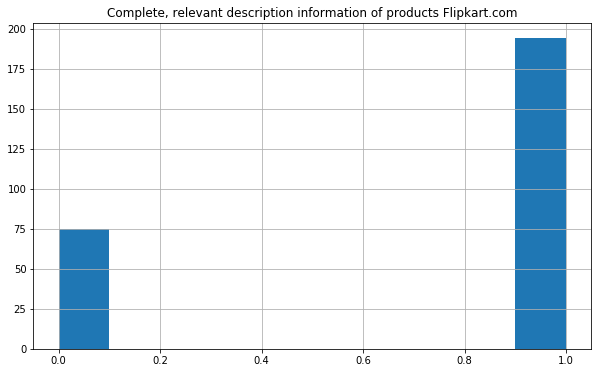

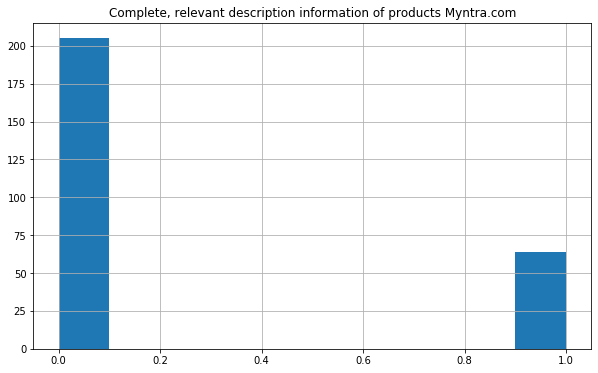

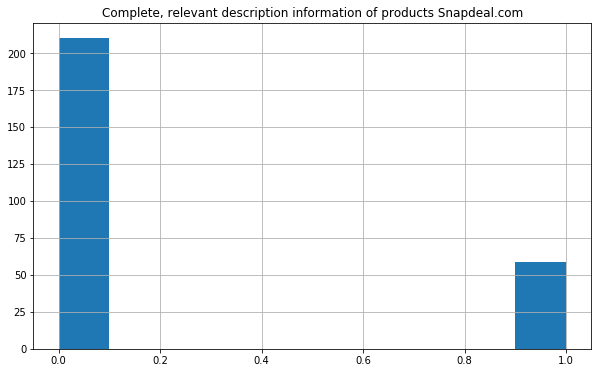

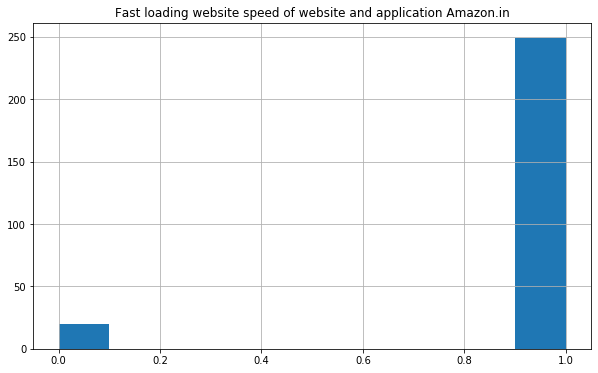

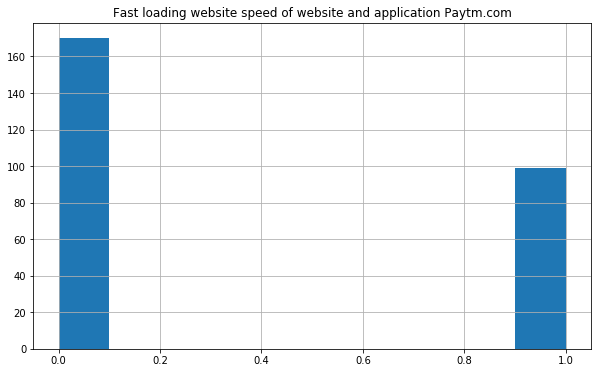

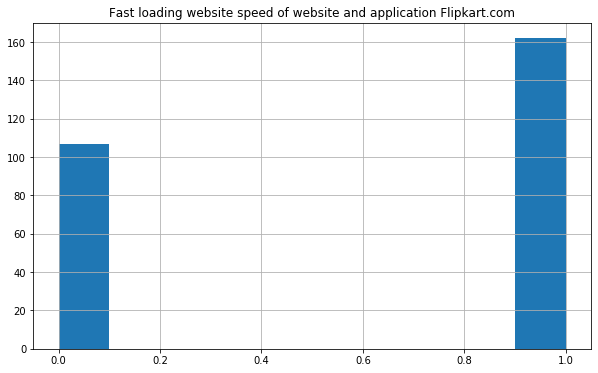

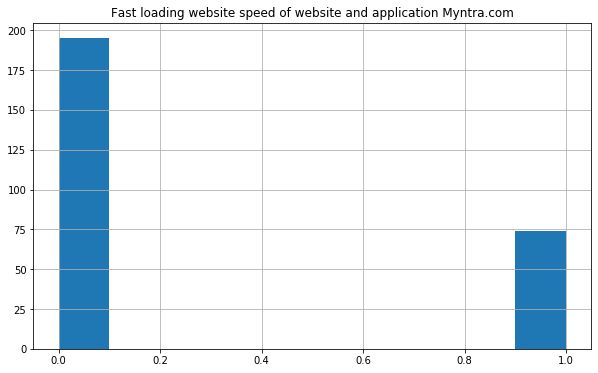

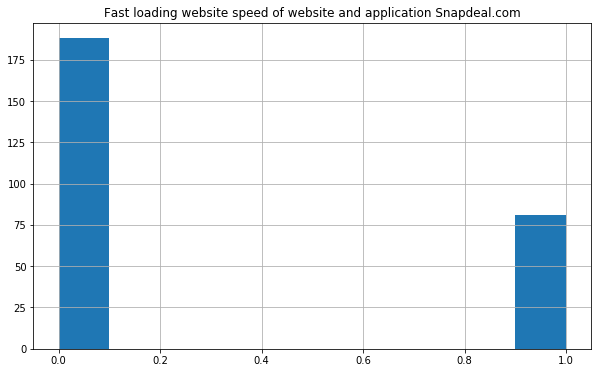

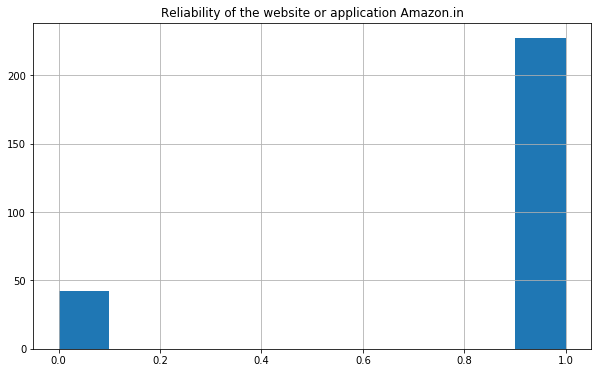

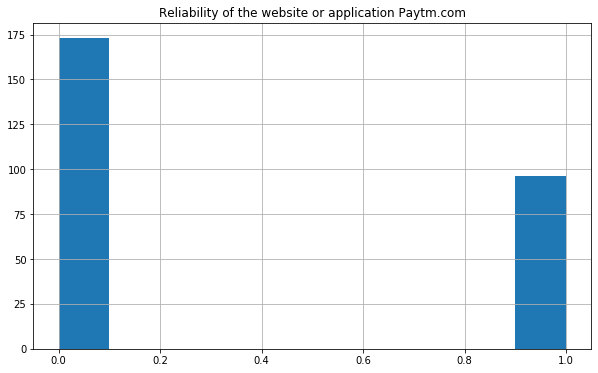

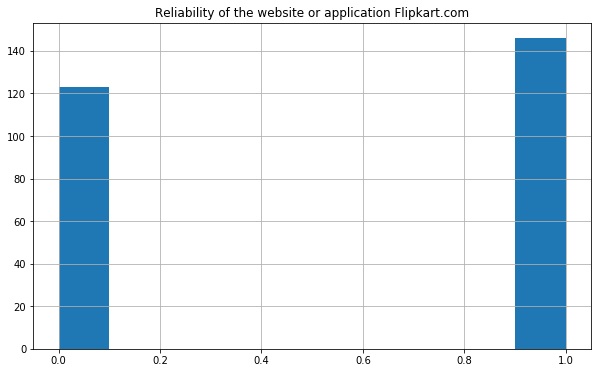

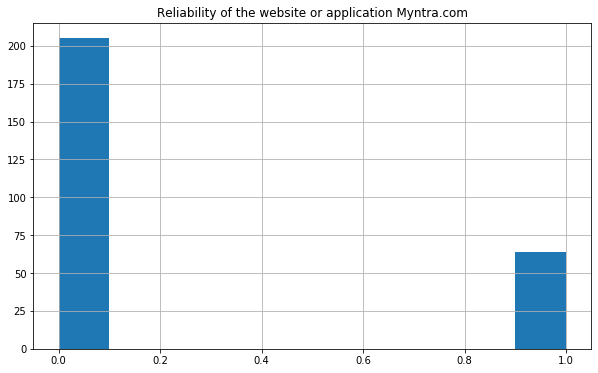

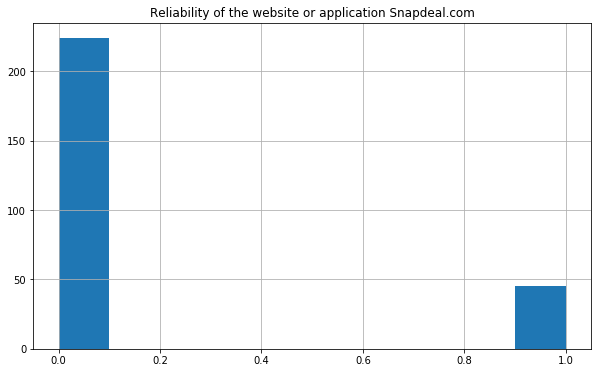

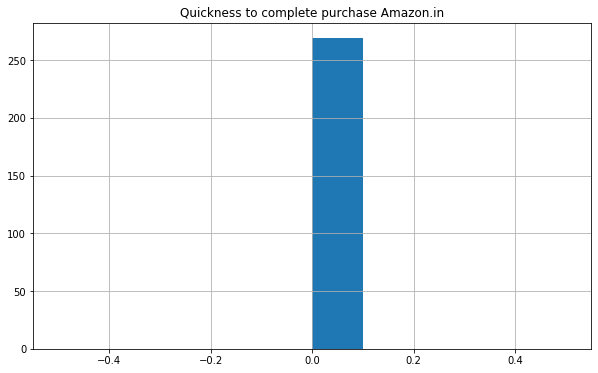

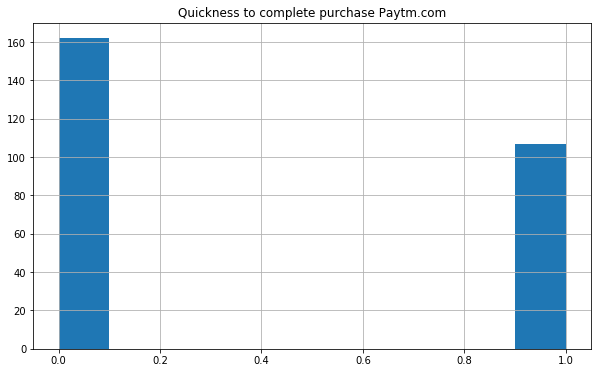

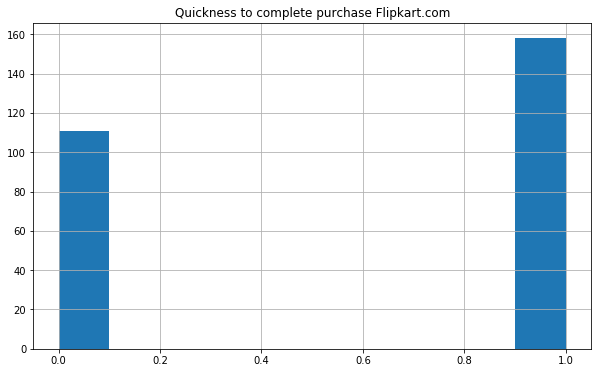

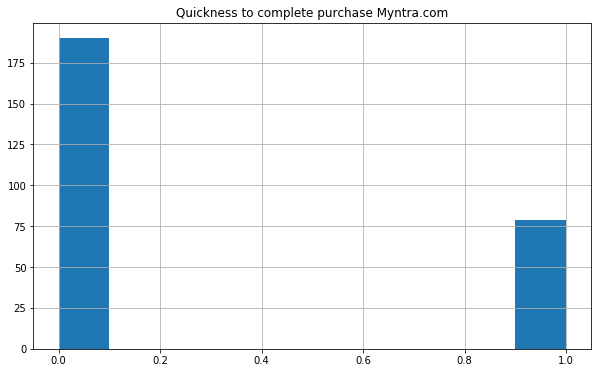

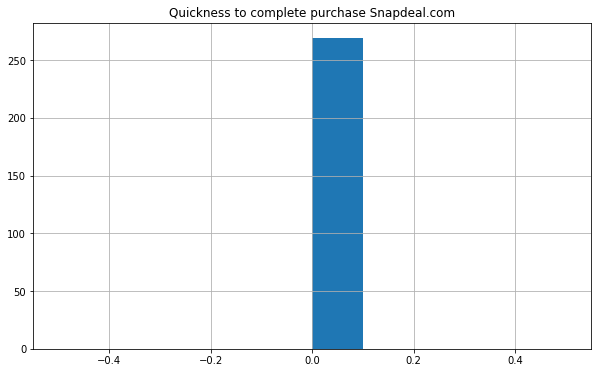

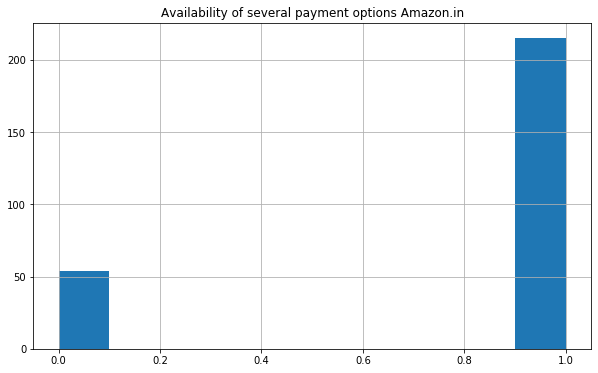

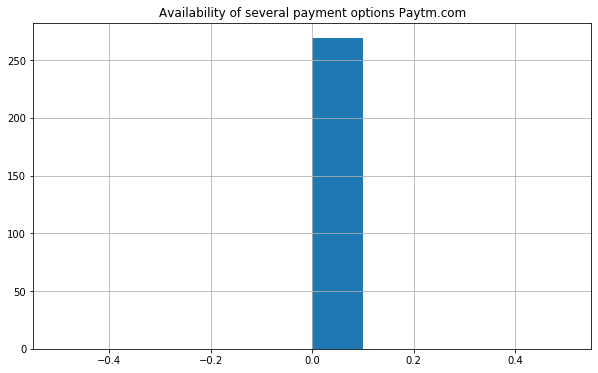

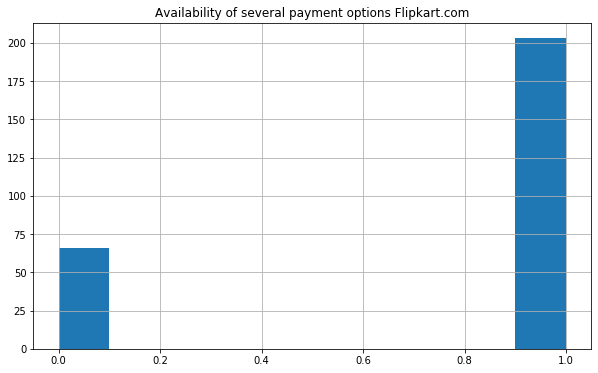

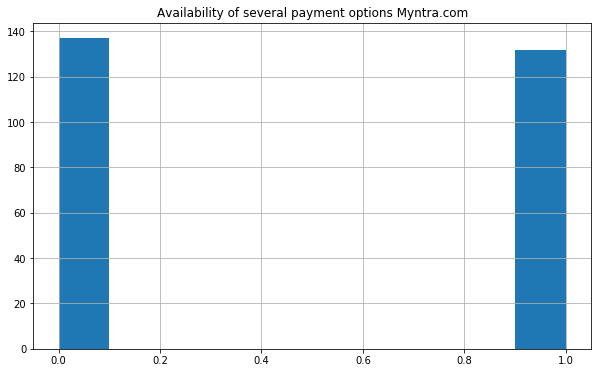

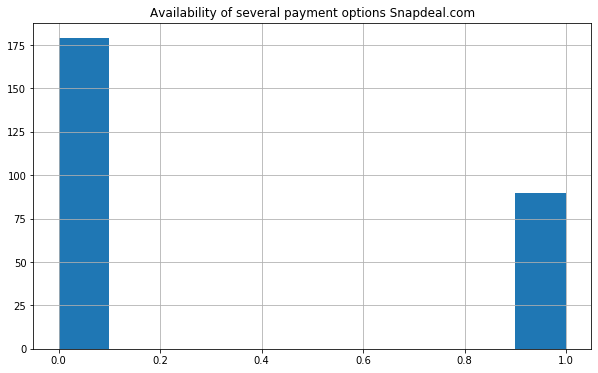

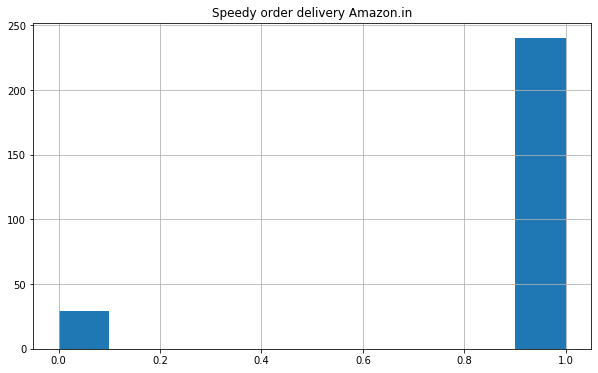

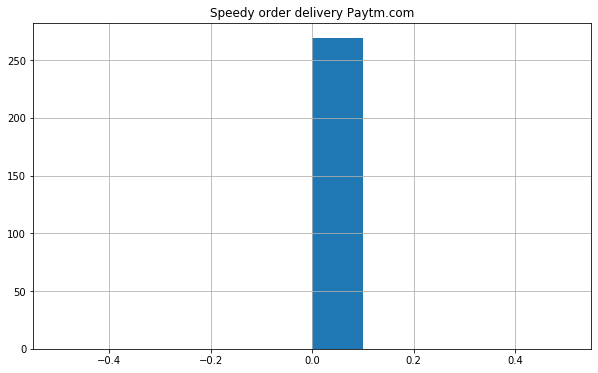

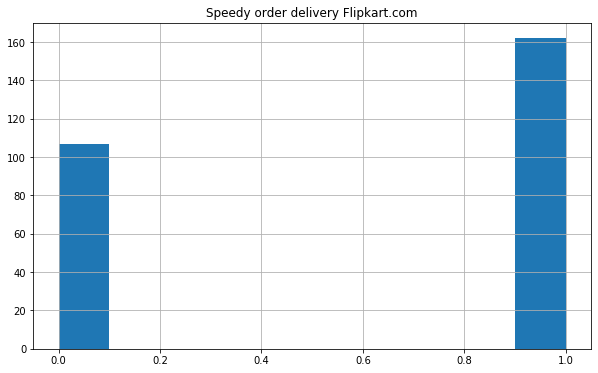

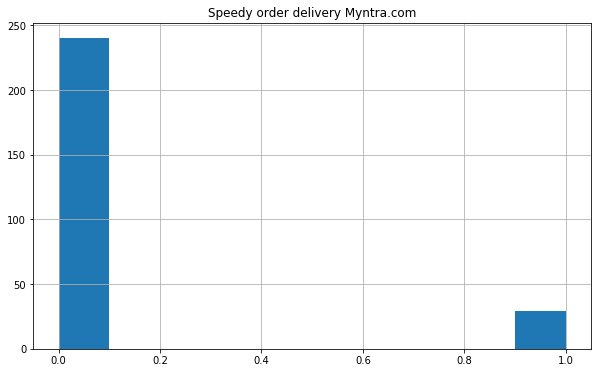

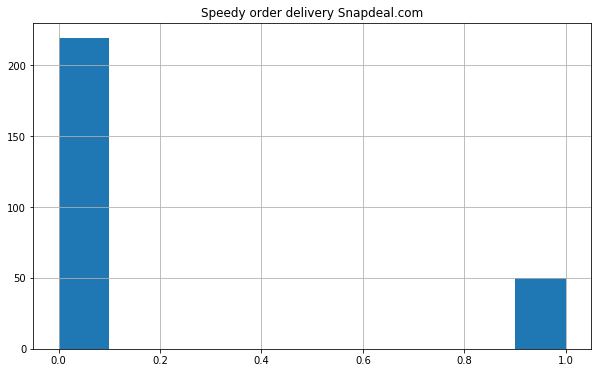

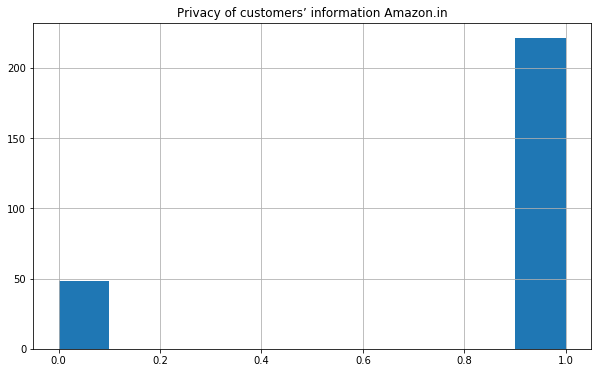

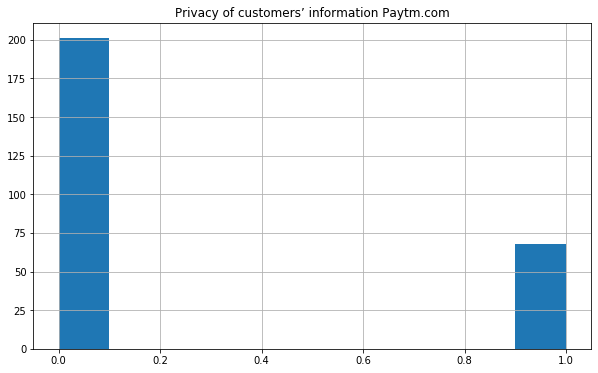

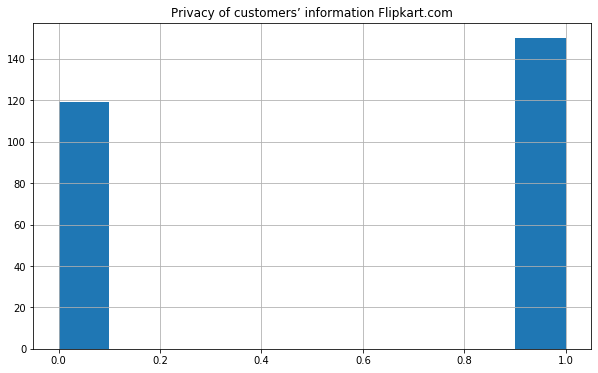

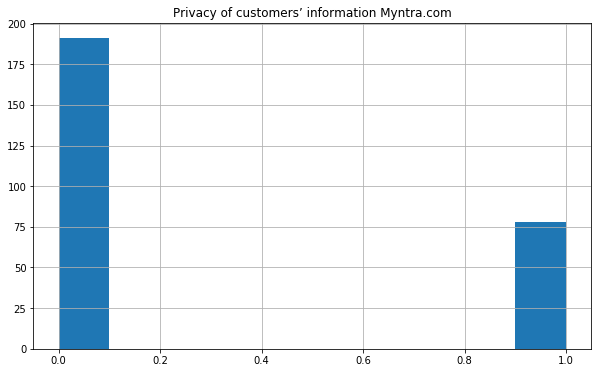

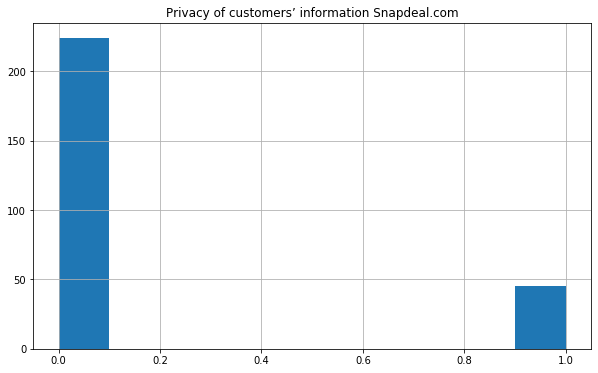

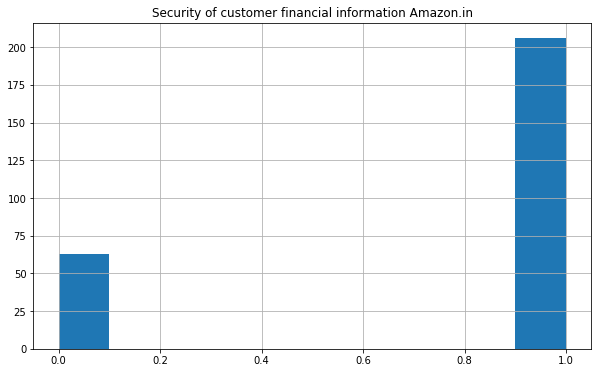

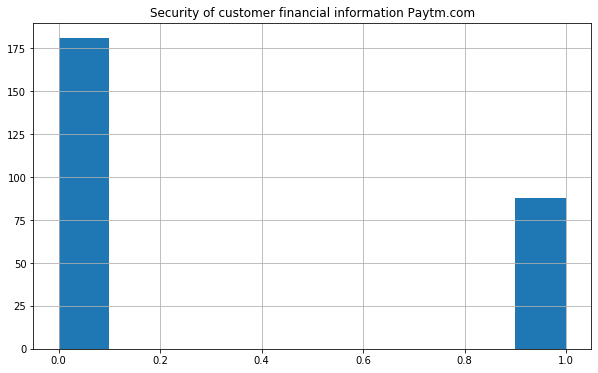

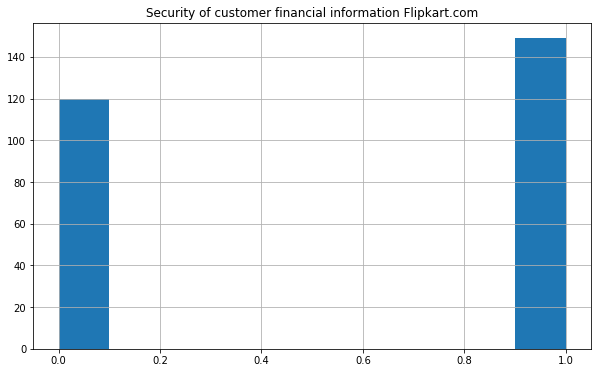

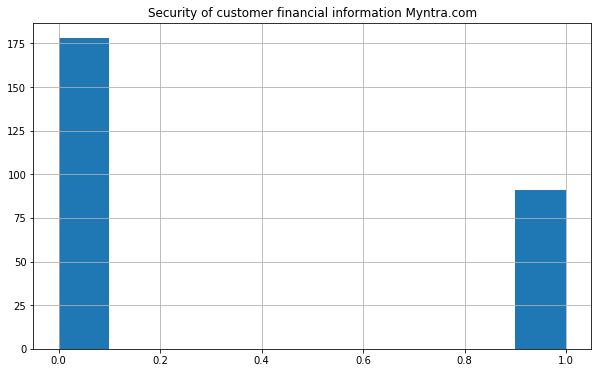

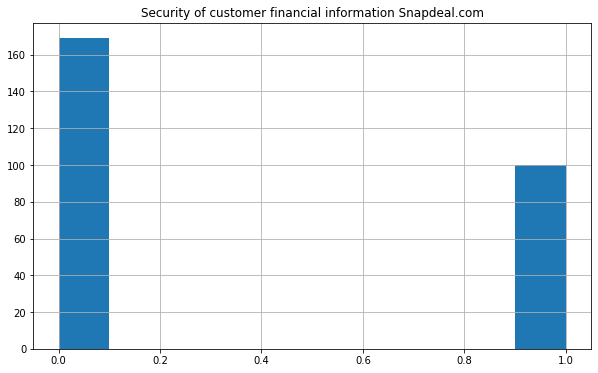

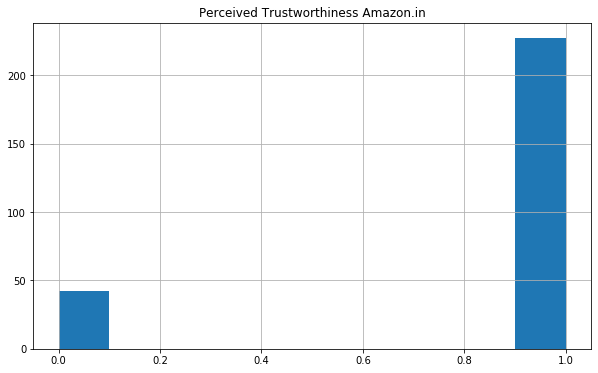

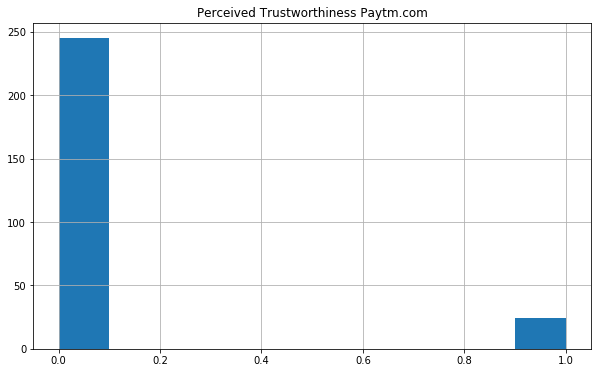

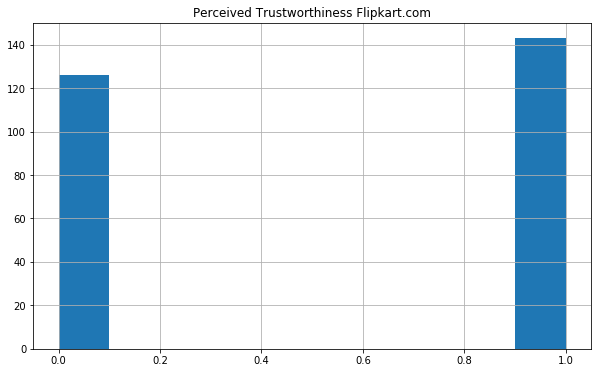

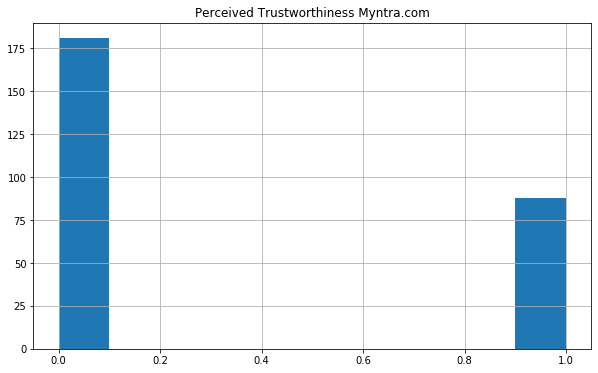

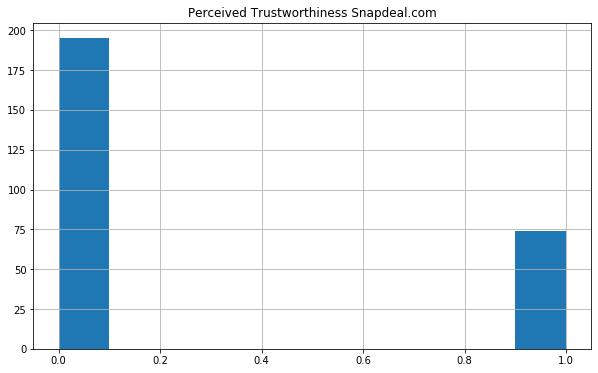

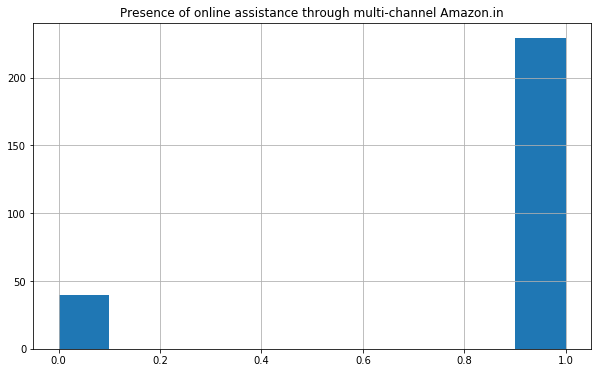

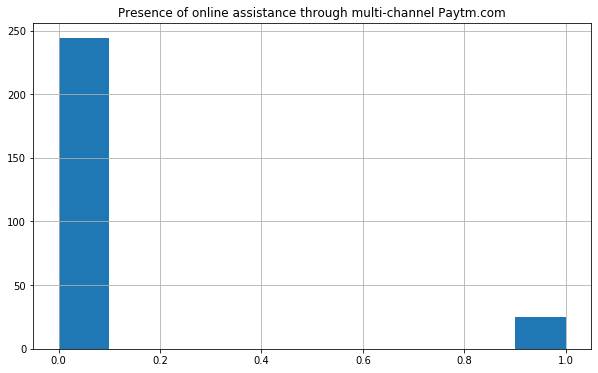

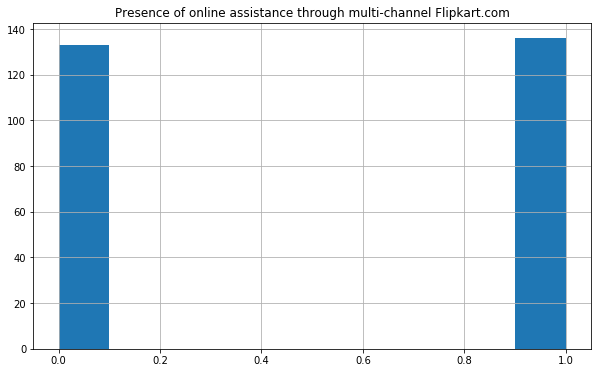

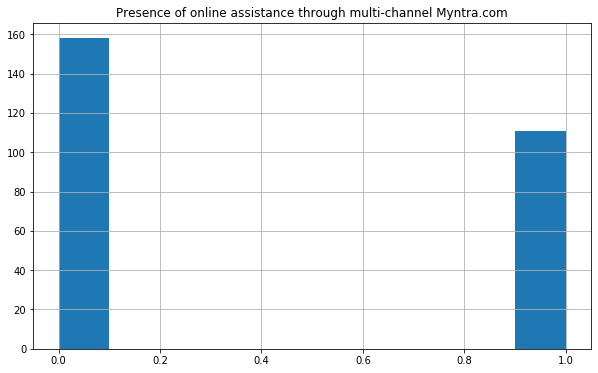

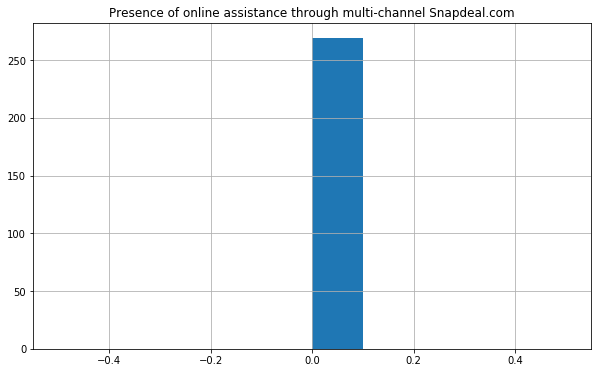

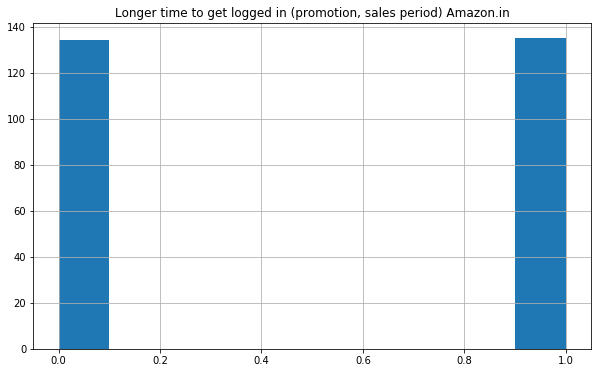

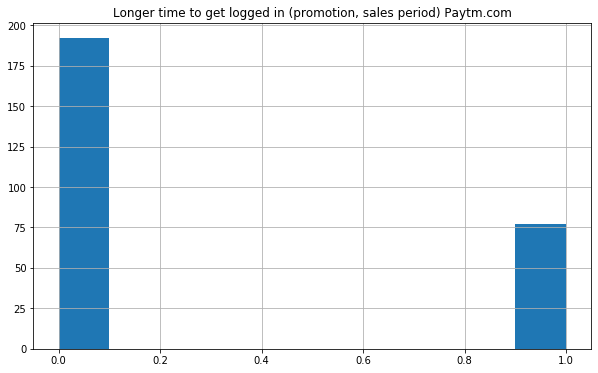

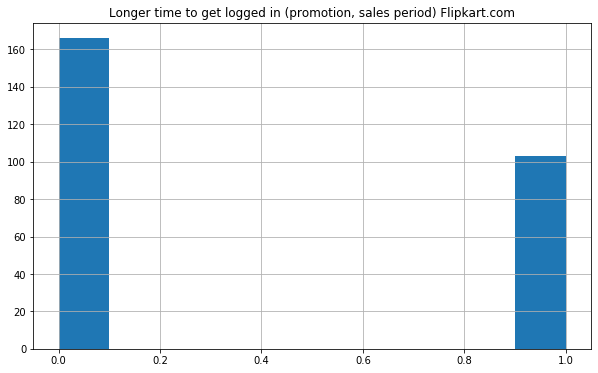

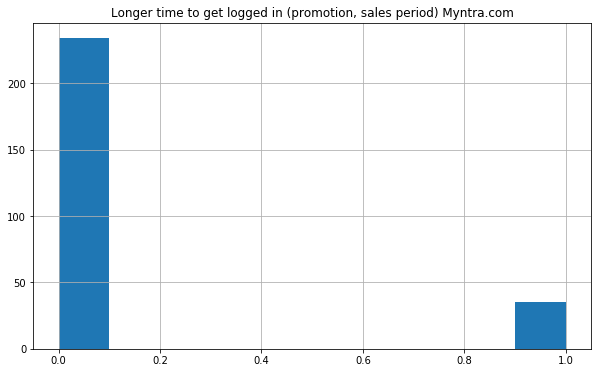

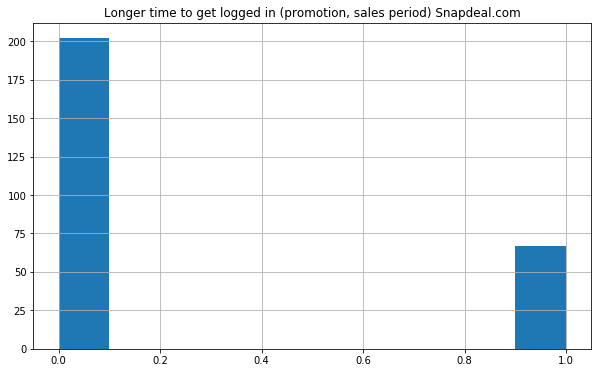

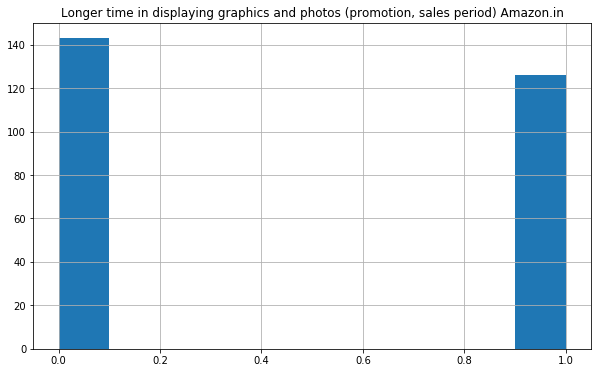

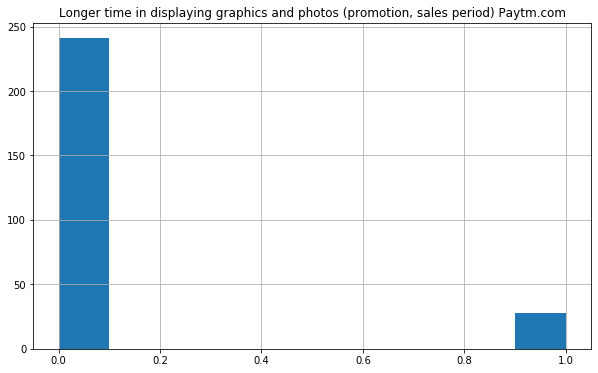

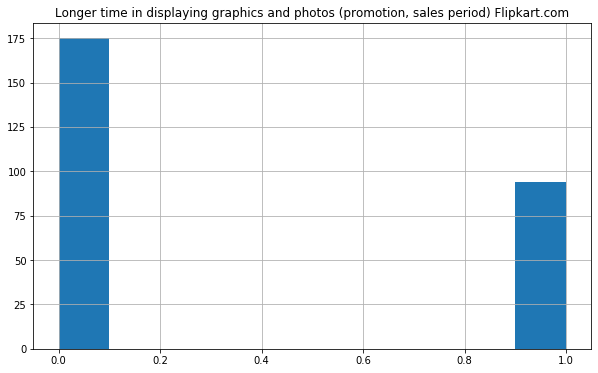

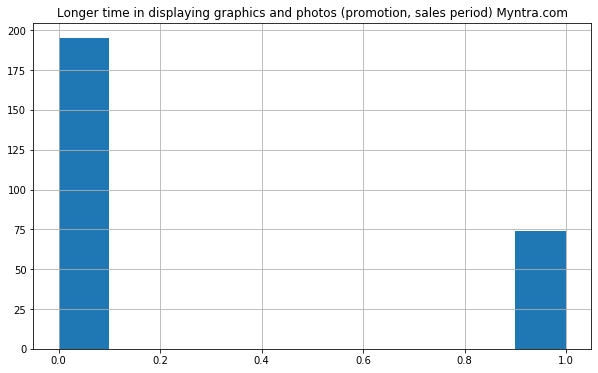

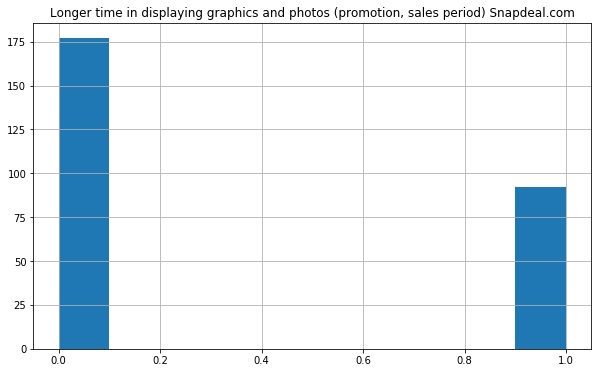

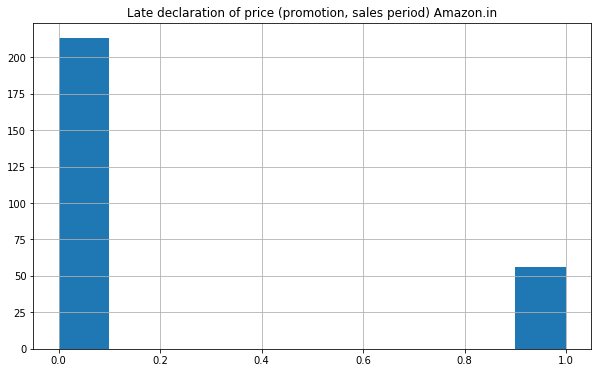

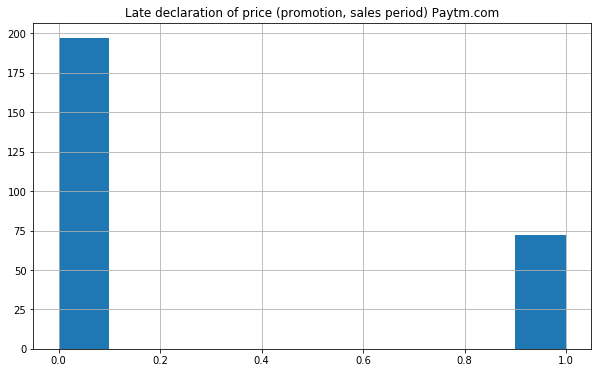

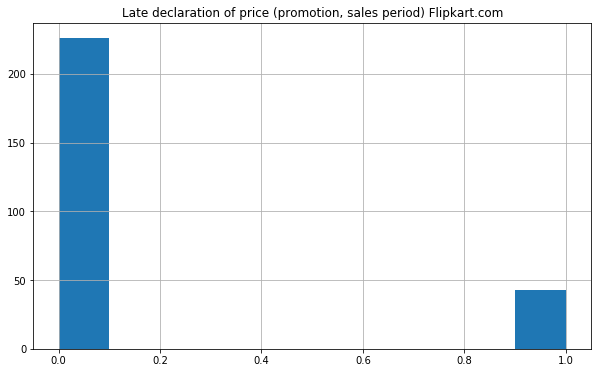

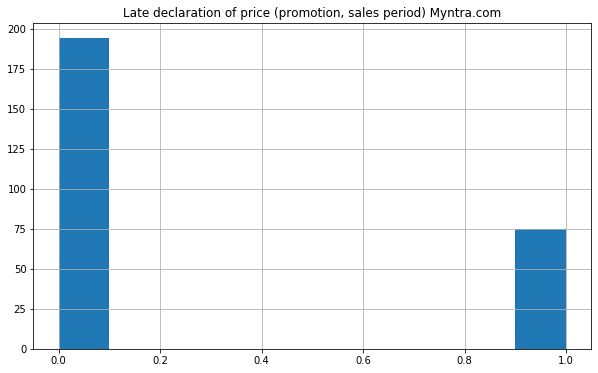

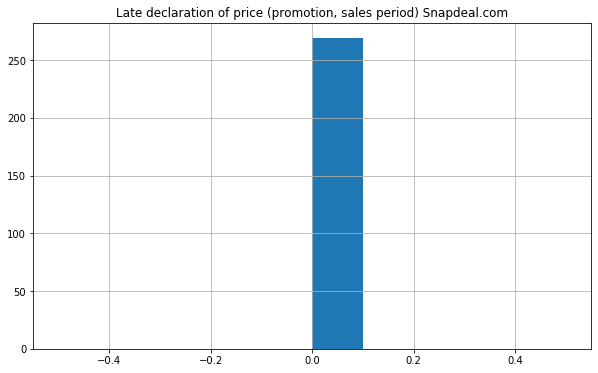

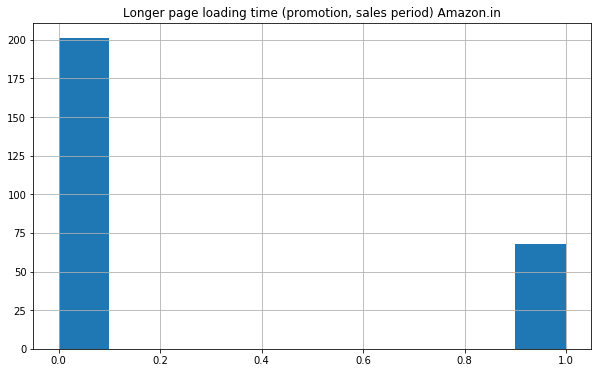

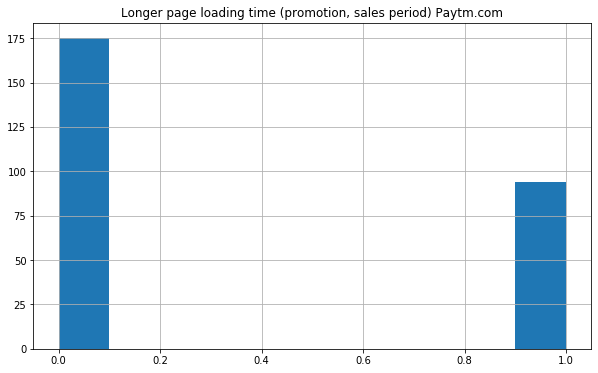

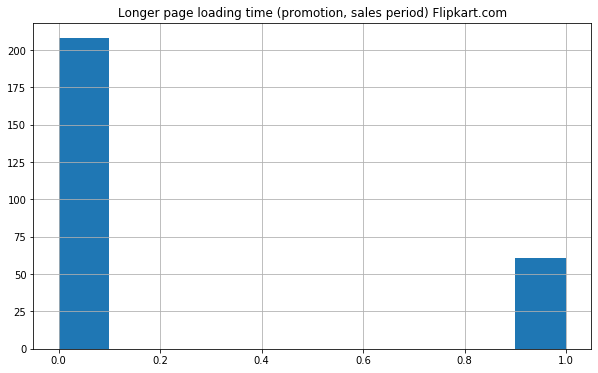

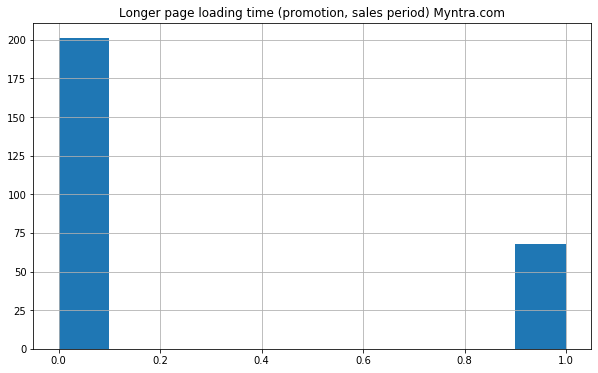

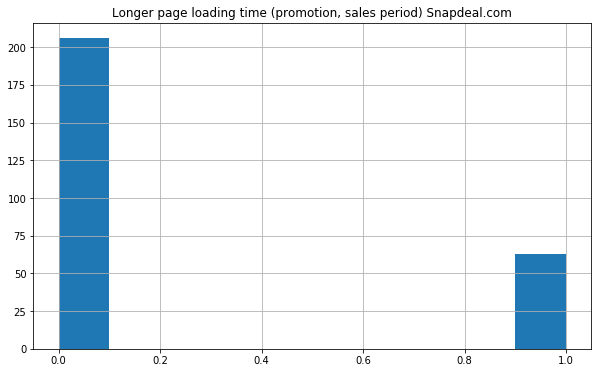

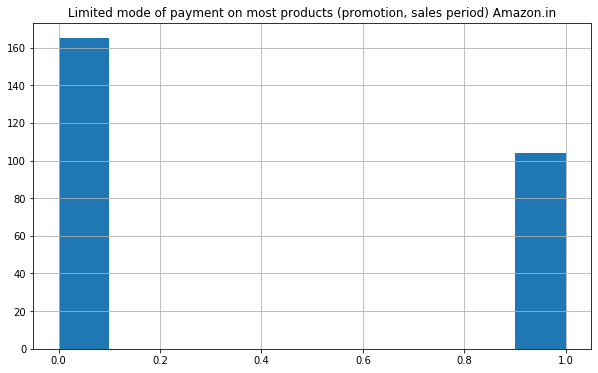

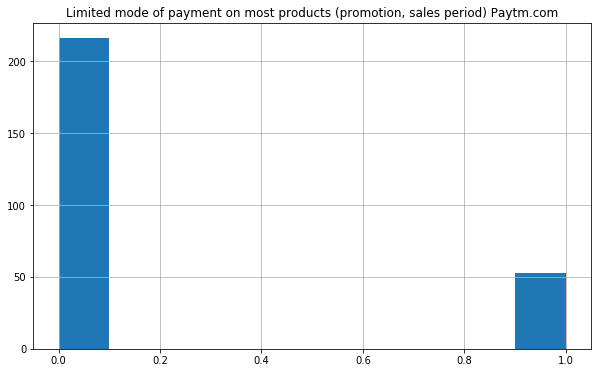

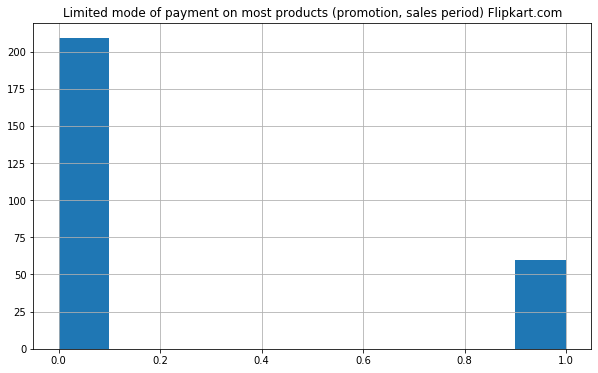

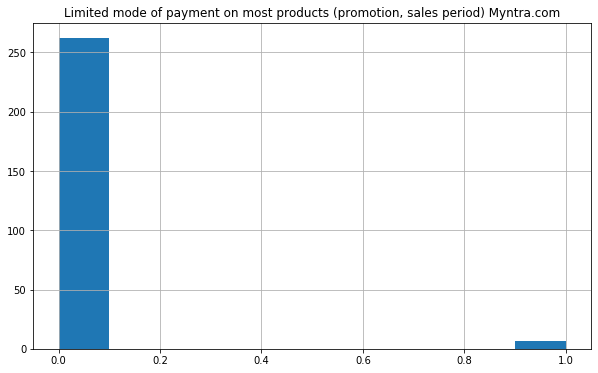

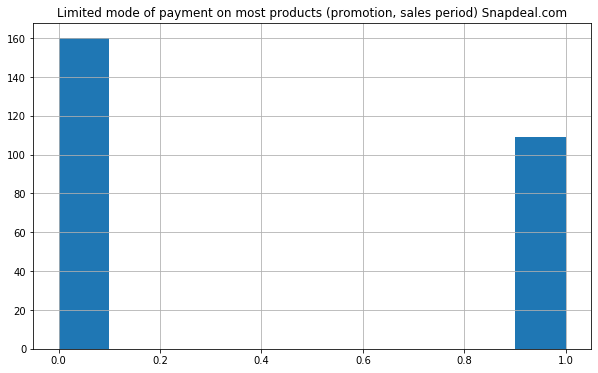

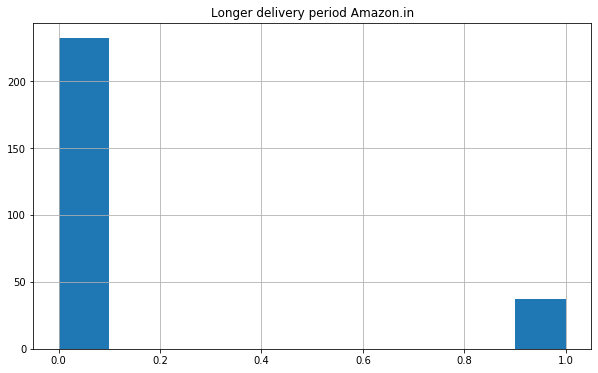

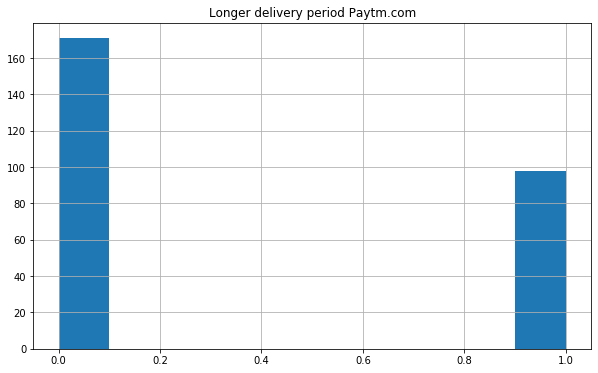

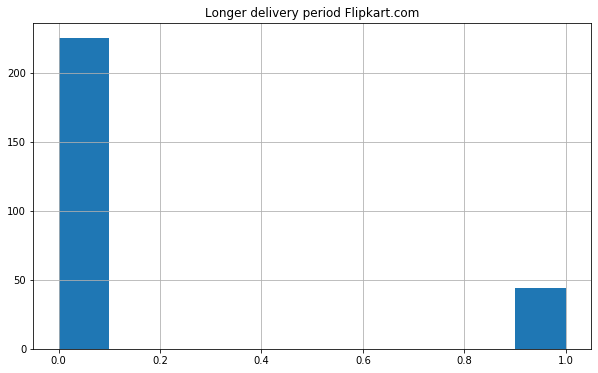

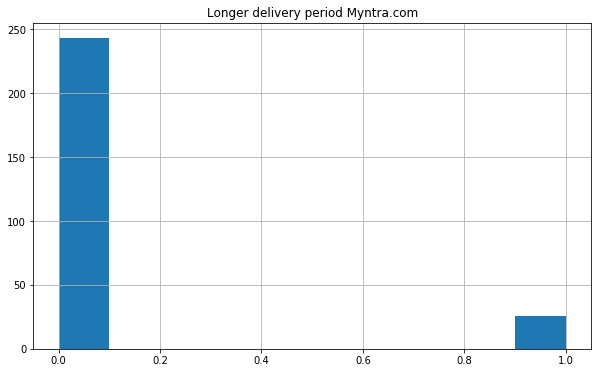

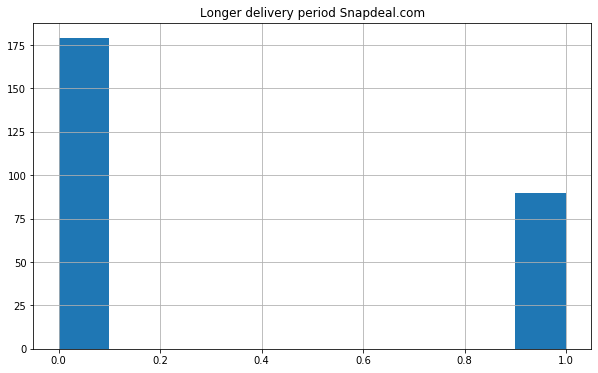

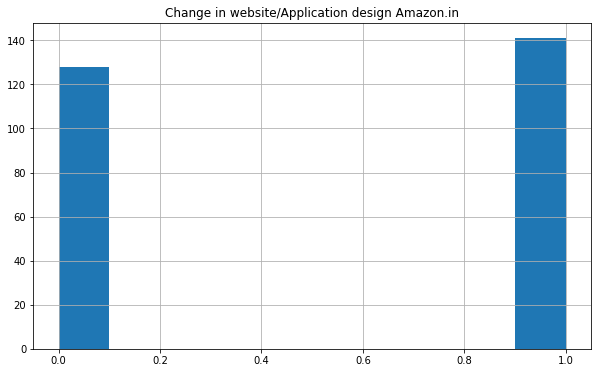

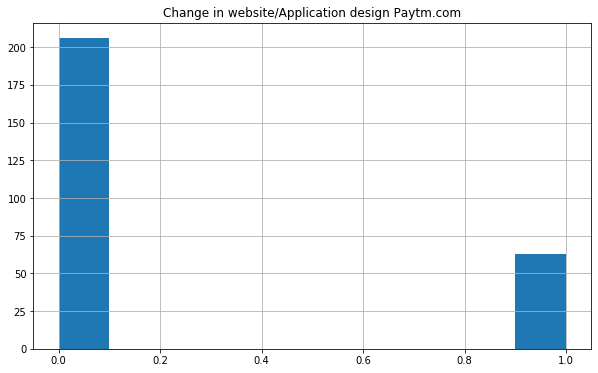

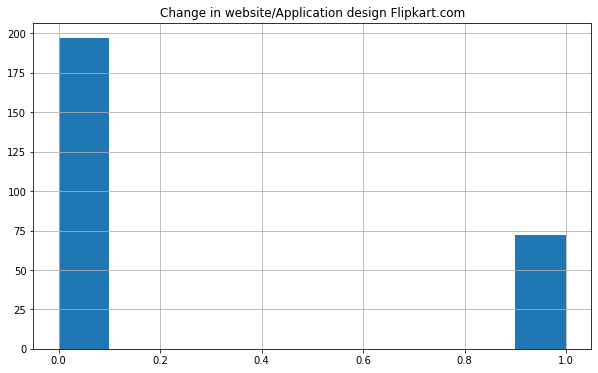

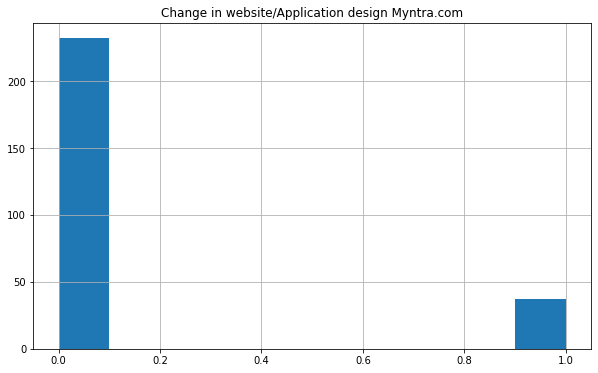

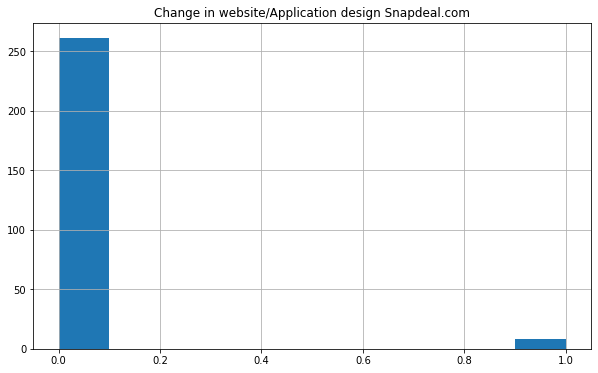

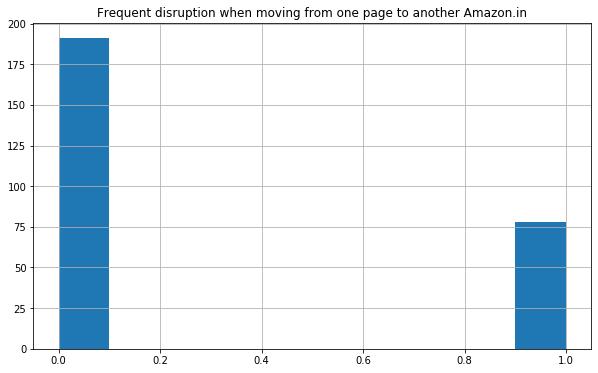

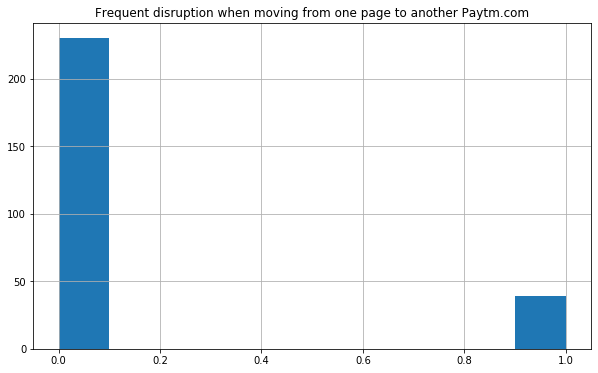

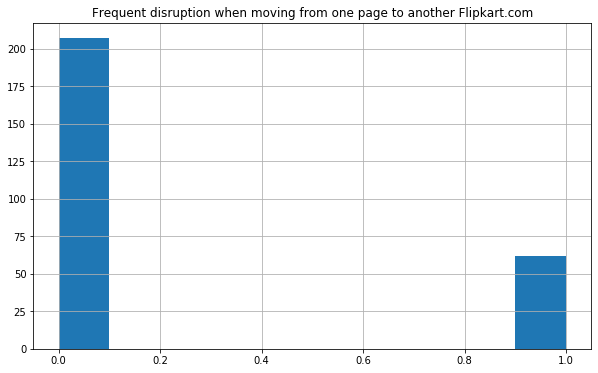

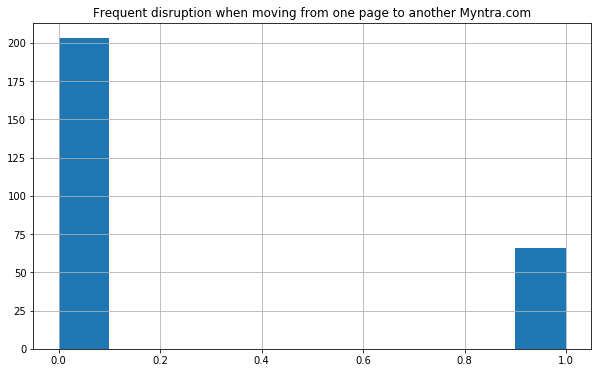

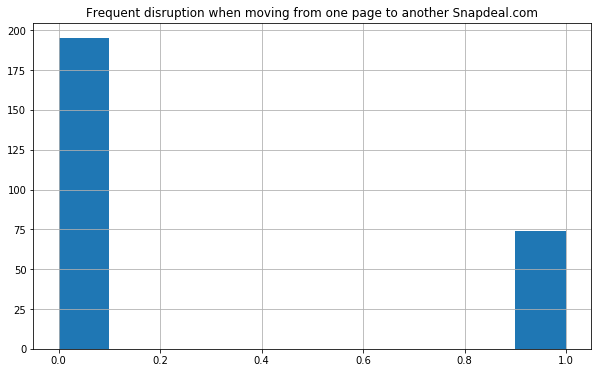

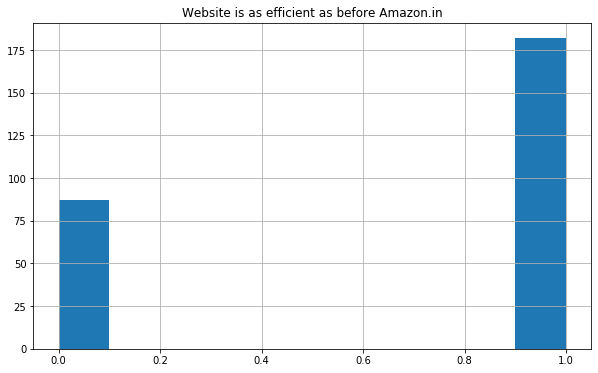

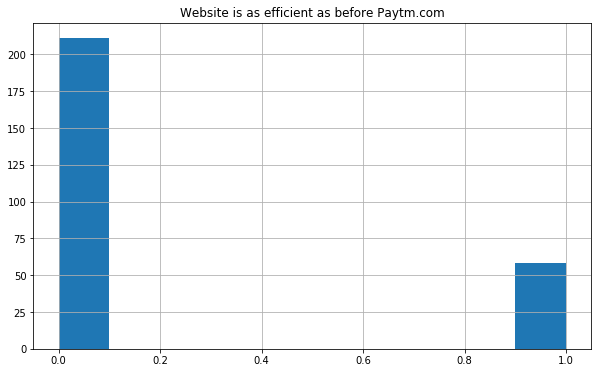

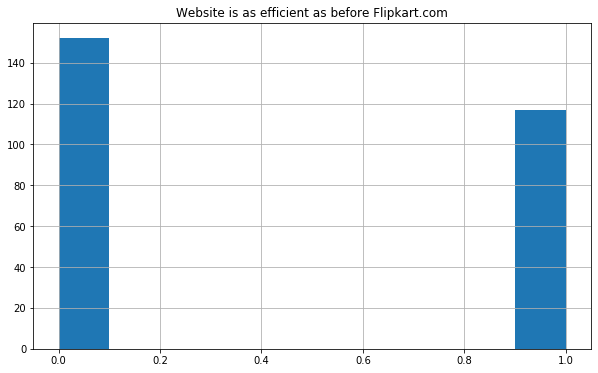

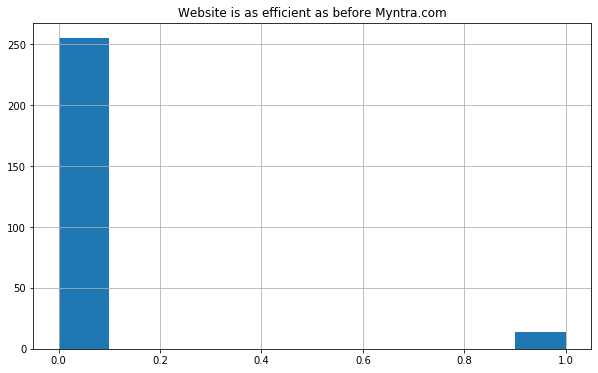

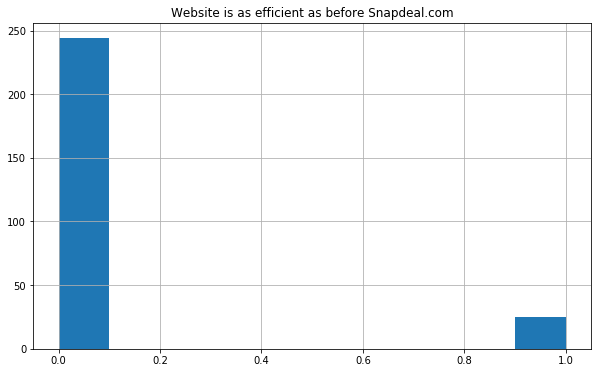

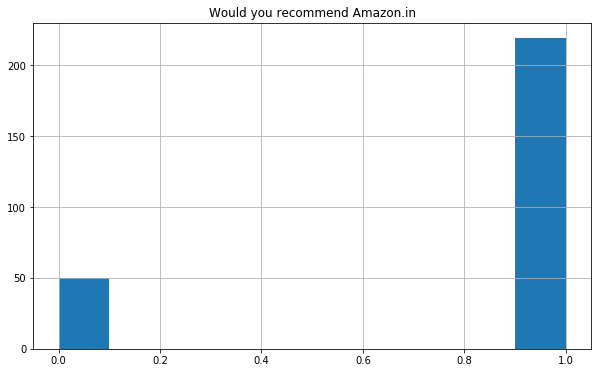

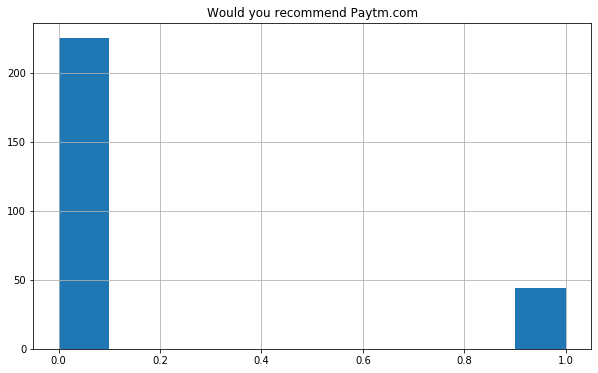

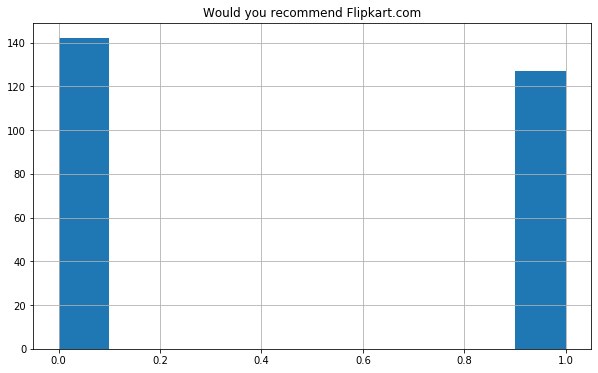

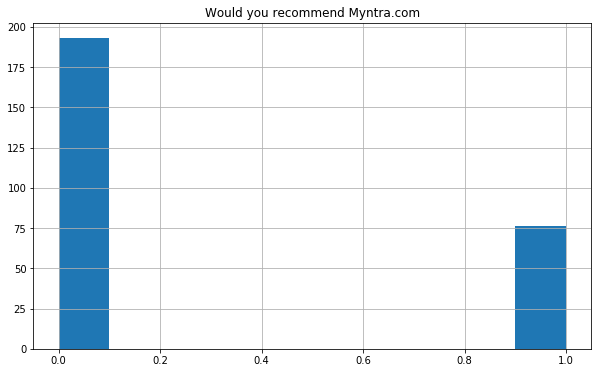

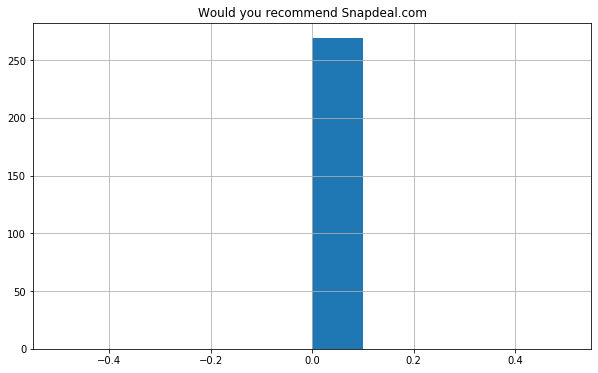

In [15]:
for i in df.columns:                                 #univariate analysis
    plt.figure(figsize = (10, 6))
    df[i].hist(grid = True)
    plt.title(i)
    plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 <a list of 39 Text xticklabel objects>)

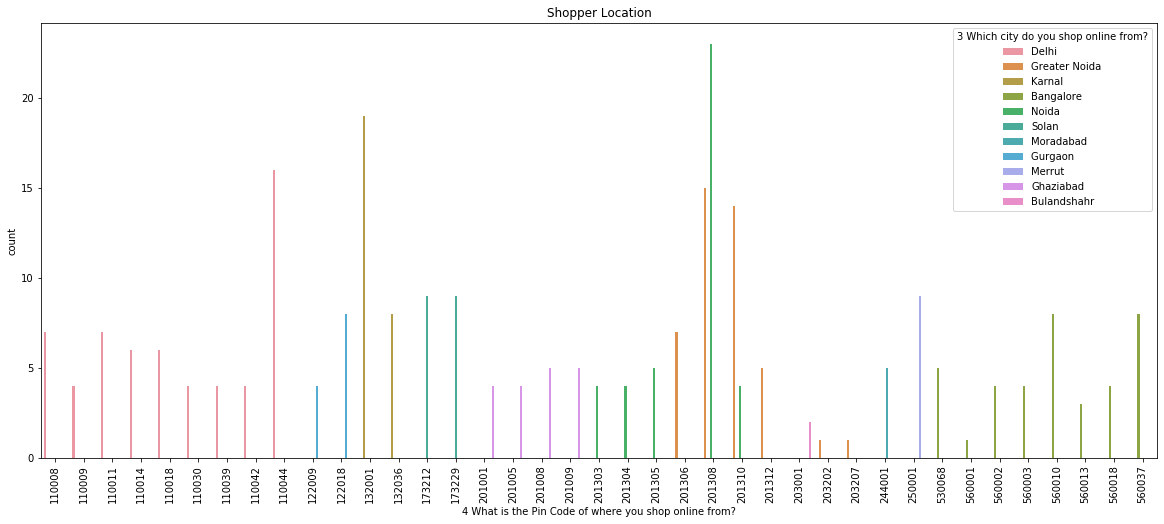

In [16]:
plt.figure(figsize=(20, 8))
plt.title('Shopper Location')
sns.countplot(df['4 What is the Pin Code of where you shop online from?'], hue=df['3 Which city do you shop online from?'])
plt.xticks(rotation='vertical')

In [17]:
df.shape

(269, 167)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

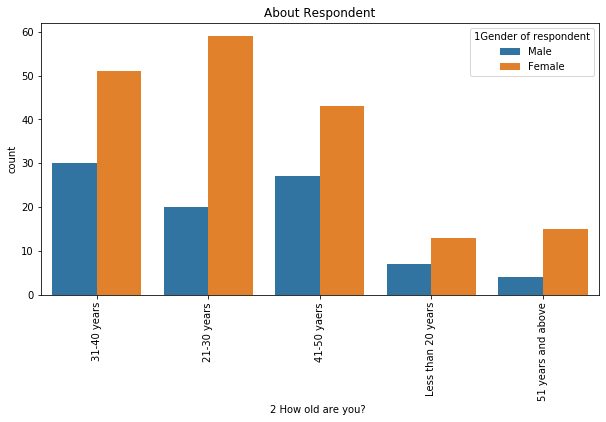

In [18]:
plt.figure(figsize=(10, 5))
plt.title('About Respondent')
sns.countplot(df['2 How old are you? '], hue=df['1Gender of respondent'])
plt.xticks(rotation='vertical')

In [19]:
# 'Shopped from Amazon.in', 'Shopped from Paytm.com', 'Shopped from Flipkart.com', 'Shopped from Myntra.com', 'Shopped from Snapdeal.com'

Text(0.5, 1.0, 'Shopped from Snapdeal.com')

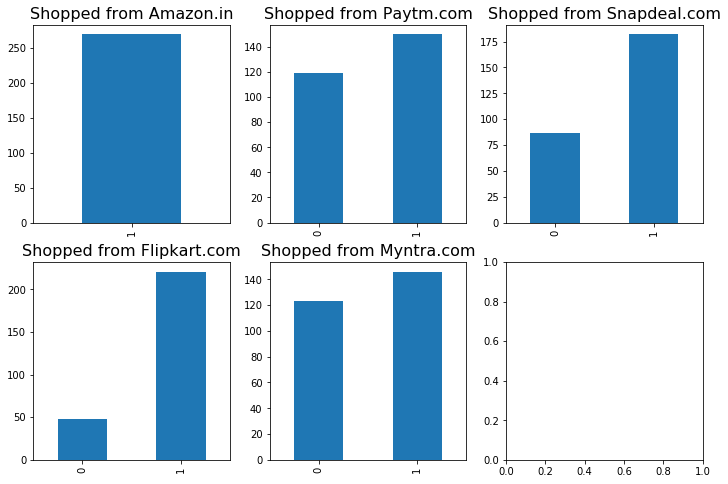

In [32]:
fig, axarr = plt.subplots(2, 3, figsize=(12, 8))
df['Shopped from Amazon.in'].value_counts().sort_index().plot.bar(ax=axarr[0][0])
axarr[0][0].set_title("Shopped from Amazon.in", fontsize=16)
df['Shopped from Paytm.com'].value_counts().sort_index().plot.bar(ax=axarr[0][1])
axarr[0][1].set_title("Shopped from Paytm.com", fontsize=16)
df['Shopped from Flipkart.com'].value_counts().sort_index().plot.bar(ax=axarr[1][0])
axarr[1][0].set_title("Shopped from Flipkart.com", fontsize=16)
df['Shopped from Myntra.com'].value_counts().sort_index().plot.bar(ax=axarr[1][1])
axarr[1][1].set_title("Shopped from Myntra.com", fontsize=16)
df['Shopped from Snapdeal.com'].value_counts().sort_index().plot.bar(ax=axarr[0][2])
axarr[0][2].set_title("Shopped from Snapdeal.com", fontsize=16)

Text(0.5, 1.0, 'Easy to use Snapdeal.com')

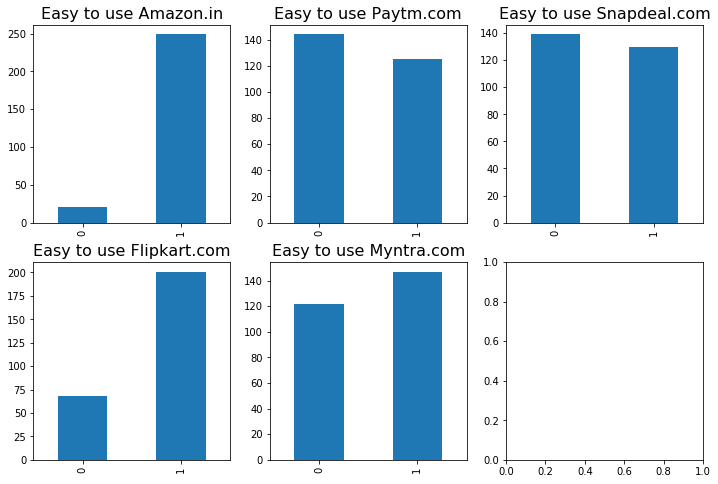

In [33]:
fig, axarr = plt.subplots(2, 3, figsize=(12, 8))
df['Easy to use Amazon.in'].value_counts().sort_index().plot.bar(ax=axarr[0][0])
axarr[0][0].set_title("Easy to use Amazon.in", fontsize=16)
df['Easy to use Paytm.com'].value_counts().sort_index().plot.bar(ax=axarr[0][1])
axarr[0][1].set_title("Easy to use Paytm.com", fontsize=16)
df['Easy to use Flipkart.com'].value_counts().sort_index().plot.bar(ax=axarr[1][0])
axarr[1][0].set_title("Easy to use Flipkart.com", fontsize=16)
df['Easy to use Myntra.com'].value_counts().sort_index().plot.bar(ax=axarr[1][1])
axarr[1][1].set_title("Easy to use Myntra.com", fontsize=16)
df['Easy to use Snapdeal.com'].value_counts().sort_index().plot.bar(ax=axarr[0][2])
axarr[0][2].set_title("Easy to use Snapdeal.com", fontsize=16)

Text(0.5, 1.0, 'Visual appealing web-page layout Snapdeal.com')

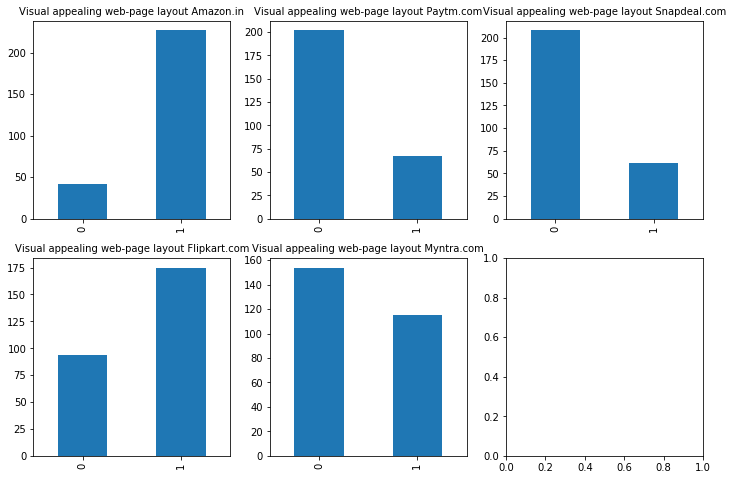

In [36]:
fig, axarr = plt.subplots(2, 3, figsize=(12, 8))
df['Visual appealing web-page layout Amazon.in'].value_counts().sort_index().plot.bar(ax=axarr[0][0])
axarr[0][0].set_title("Visual appealing web-page layout Amazon.in", fontsize=10)
df['Visual appealing web-page layout Paytm.com'].value_counts().sort_index().plot.bar(ax=axarr[0][1])
axarr[0][1].set_title("Visual appealing web-page layout Paytm.com", fontsize=10)
df['Visual appealing web-page layout Flipkart.com'].value_counts().sort_index().plot.bar(ax=axarr[1][0])
axarr[1][0].set_title("Visual appealing web-page layout Flipkart.com", fontsize=10)
df['Visual appealing web-page layout Myntra.com'].value_counts().sort_index().plot.bar(ax=axarr[1][1])
axarr[1][1].set_title("Visual appealing web-page layout Myntra.com", fontsize=10)
df['Visual appealing web-page layout Snapdeal.com'].value_counts().sort_index().plot.bar(ax=axarr[0][2])
axarr[0][2].set_title("Visual appealing web-page layout Snapdeal.com", fontsize=10)

Text(0.5, 1.0, 'Would you recommend Snapdeal.com')

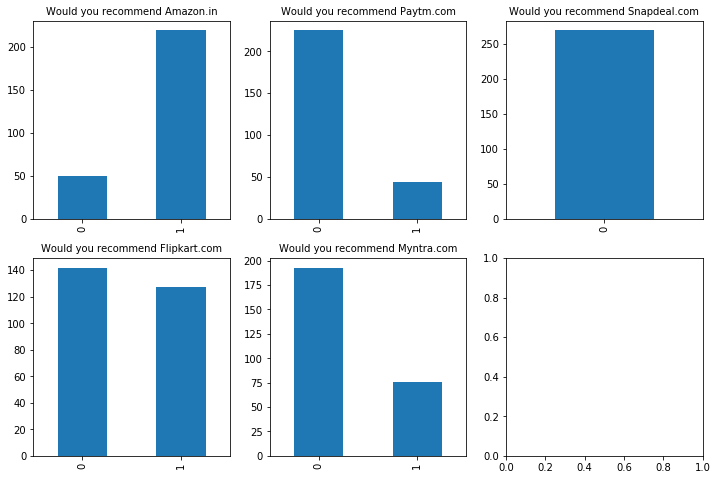

In [37]:
fig, axarr = plt.subplots(2, 3, figsize=(12, 8))
df['Would you recommend Amazon.in'].value_counts().sort_index().plot.bar(ax=axarr[0][0])
axarr[0][0].set_title("Would you recommend Amazon.in", fontsize=10)
df['Would you recommend Paytm.com'].value_counts().sort_index().plot.bar(ax=axarr[0][1])
axarr[0][1].set_title("Would you recommend Paytm.com", fontsize=10)
df['Would you recommend Flipkart.com'].value_counts().sort_index().plot.bar(ax=axarr[1][0])
axarr[1][0].set_title("Would you recommend Flipkart.com", fontsize=10)
df['Would you recommend Myntra.com'].value_counts().sort_index().plot.bar(ax=axarr[1][1])
axarr[1][1].set_title("Would you recommend Myntra.com", fontsize=10)
df['Would you recommend Snapdeal.com'].value_counts().sort_index().plot.bar(ax=axarr[0][2])
axarr[0][2].set_title("Would you recommend Snapdeal.com", fontsize=10)

Text(0.5, 1.0, 'Reliability of the website or application Snapdeal.com')

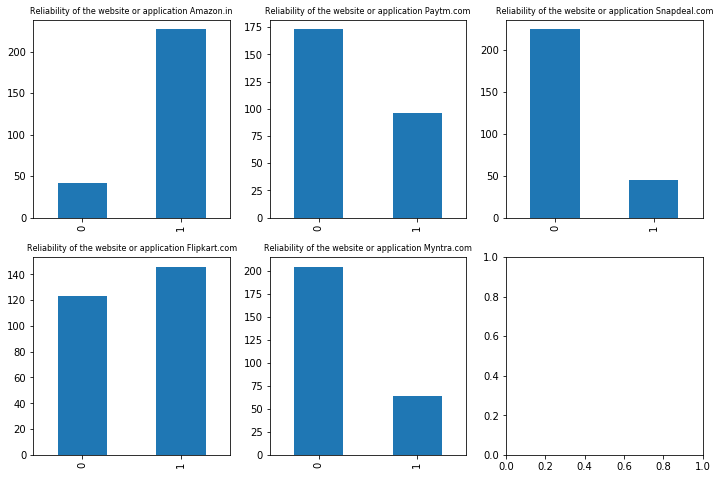

In [40]:
fig, axarr = plt.subplots(2, 3, figsize=(12, 8))
df['Reliability of the website or application Amazon.in'].value_counts().sort_index().plot.bar(ax=axarr[0][0])
axarr[0][0].set_title("Reliability of the website or application Amazon.in", fontsize=8)
df['Reliability of the website or application Paytm.com'].value_counts().sort_index().plot.bar(ax=axarr[0][1])
axarr[0][1].set_title("Reliability of the website or application Paytm.com", fontsize=8)
df['Reliability of the website or application Flipkart.com'].value_counts().sort_index().plot.bar(ax=axarr[1][0])
axarr[1][0].set_title("Reliability of the website or application Flipkart.com", fontsize=8)
df['Reliability of the website or application Myntra.com'].value_counts().sort_index().plot.bar(ax=axarr[1][1])
axarr[1][1].set_title("Reliability of the website or application Myntra.com", fontsize=8)
df['Reliability of the website or application Snapdeal.com'].value_counts().sort_index().plot.bar(ax=axarr[0][2])
axarr[0][2].set_title("Reliability of the website or application Snapdeal.com", fontsize=8)

Text(0.5, 1.0, 'Complete information of products Snapdeal.com')

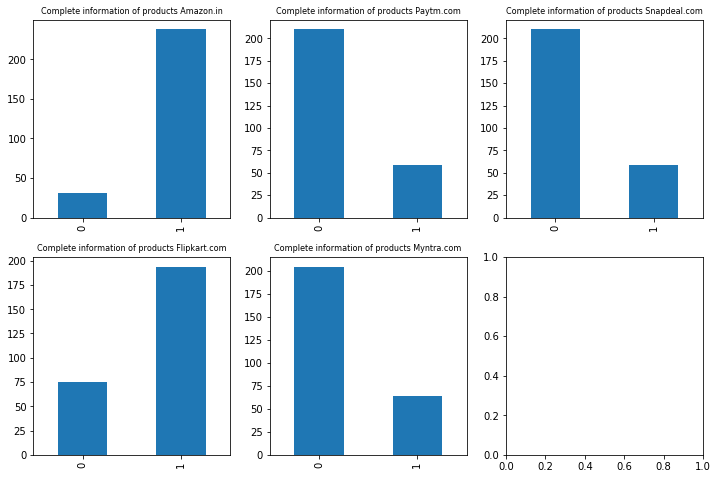

In [41]:
fig, axarr = plt.subplots(2, 3, figsize=(12, 8))
df['Complete, relevant description information of products Amazon.in'].value_counts().sort_index().plot.bar(ax=axarr[0][0])
axarr[0][0].set_title("Complete information of products Amazon.in", fontsize=8)
df['Complete, relevant description information of products Paytm.com'].value_counts().sort_index().plot.bar(ax=axarr[0][1])
axarr[0][1].set_title("Complete information of products Paytm.com", fontsize=8)
df['Complete, relevant description information of products Flipkart.com'].value_counts().sort_index().plot.bar(ax=axarr[1][0])
axarr[1][0].set_title("Complete information of products Flipkart.com", fontsize=8)
df['Complete, relevant description information of products Myntra.com'].value_counts().sort_index().plot.bar(ax=axarr[1][1])
axarr[1][1].set_title("Complete information of products Myntra.com", fontsize=8)
df['Complete, relevant description information of products Snapdeal.com'].value_counts().sort_index().plot.bar(ax=axarr[0][2])
axarr[0][2].set_title("Complete information of products Snapdeal.com", fontsize=8)

Text(0.5, 1.0, 'Quickness to complete purchase Snapdeal.com')

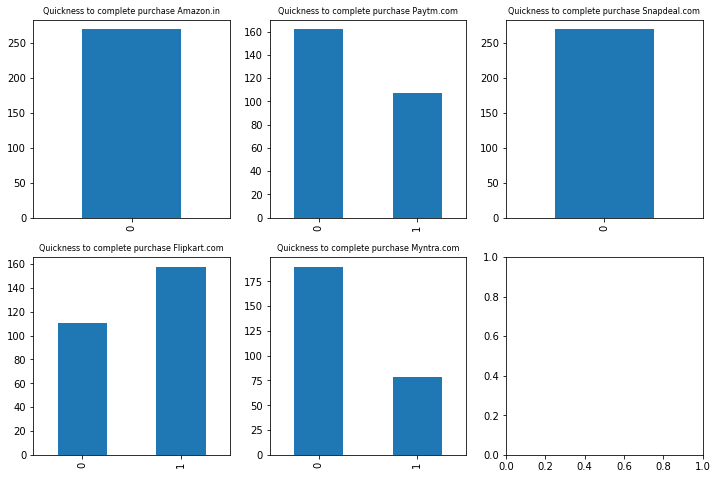

In [42]:
fig, axarr = plt.subplots(2, 3, figsize=(12, 8))
df['Quickness to complete purchase Amazon.in'].value_counts().sort_index().plot.bar(ax=axarr[0][0])
axarr[0][0].set_title("Quickness to complete purchase Amazon.in", fontsize=8)
df['Quickness to complete purchase Paytm.com'].value_counts().sort_index().plot.bar(ax=axarr[0][1])
axarr[0][1].set_title("Quickness to complete purchase Paytm.com", fontsize=8)
df['Quickness to complete purchase Flipkart.com'].value_counts().sort_index().plot.bar(ax=axarr[1][0])
axarr[1][0].set_title("Quickness to complete purchase Flipkart.com", fontsize=8)
df['Quickness to complete purchase Myntra.com'].value_counts().sort_index().plot.bar(ax=axarr[1][1])
axarr[1][1].set_title("Quickness to complete purchase Myntra.com", fontsize=8)
df['Quickness to complete purchase Snapdeal.com'].value_counts().sort_index().plot.bar(ax=axarr[0][2])
axarr[0][2].set_title("Quickness to complete purchase Snapdeal.com", fontsize=8)

Text(0.5, 1.0, 'Availability of several payment options Snapdeal.com')

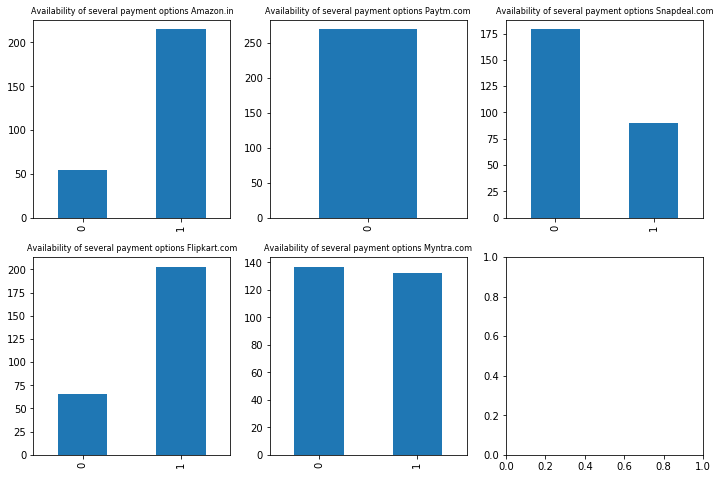

In [43]:
fig, axarr = plt.subplots(2, 3, figsize=(12, 8))
df['Availability of several payment options Amazon.in'].value_counts().sort_index().plot.bar(ax=axarr[0][0])
axarr[0][0].set_title("Availability of several payment options Amazon.in", fontsize=8)
df['Availability of several payment options Paytm.com'].value_counts().sort_index().plot.bar(ax=axarr[0][1])
axarr[0][1].set_title("Availability of several payment options Paytm.com", fontsize=8)
df['Availability of several payment options Flipkart.com'].value_counts().sort_index().plot.bar(ax=axarr[1][0])
axarr[1][0].set_title("Availability of several payment options Flipkart.com", fontsize=8)
df['Availability of several payment options Myntra.com'].value_counts().sort_index().plot.bar(ax=axarr[1][1])
axarr[1][1].set_title("Availability of several payment options Myntra.com", fontsize=8)
df['Availability of several payment options Snapdeal.com'].value_counts().sort_index().plot.bar(ax=axarr[0][2])
axarr[0][2].set_title("Availability of several payment options Snapdeal.com", fontsize=8)

Text(0.5, 1.0, 'Speedy order delivery Snapdeal.com')

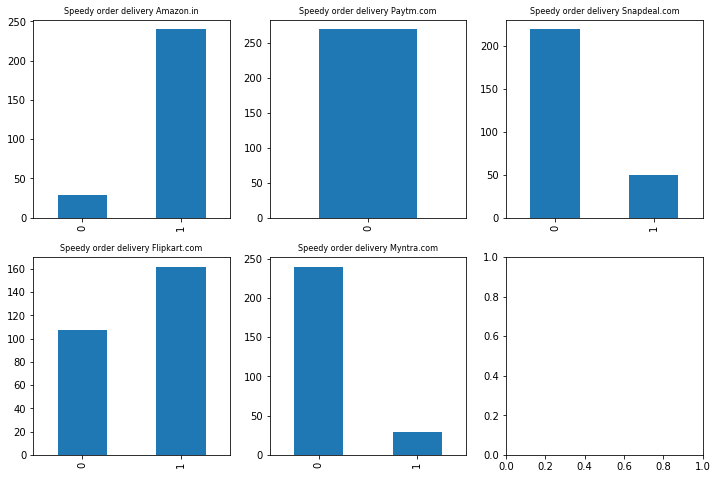

In [44]:
fig, axarr = plt.subplots(2, 3, figsize=(12, 8))
df['Speedy order delivery Amazon.in'].value_counts().sort_index().plot.bar(ax=axarr[0][0])
axarr[0][0].set_title("Speedy order delivery Amazon.in", fontsize=8)
df['Speedy order delivery Paytm.com'].value_counts().sort_index().plot.bar(ax=axarr[0][1])
axarr[0][1].set_title("Speedy order delivery Paytm.com", fontsize=8)
df['Speedy order delivery Flipkart.com'].value_counts().sort_index().plot.bar(ax=axarr[1][0])
axarr[1][0].set_title("Speedy order delivery Flipkart.com", fontsize=8)
df['Speedy order delivery Myntra.com'].value_counts().sort_index().plot.bar(ax=axarr[1][1])
axarr[1][1].set_title("Speedy order delivery Myntra.com", fontsize=8)
df['Speedy order delivery Snapdeal.com'].value_counts().sort_index().plot.bar(ax=axarr[0][2])
axarr[0][2].set_title("Speedy order delivery Snapdeal.com", fontsize=8)

Text(0.5, 1.0, 'Privacy of customers’ information Snapdeal.com')

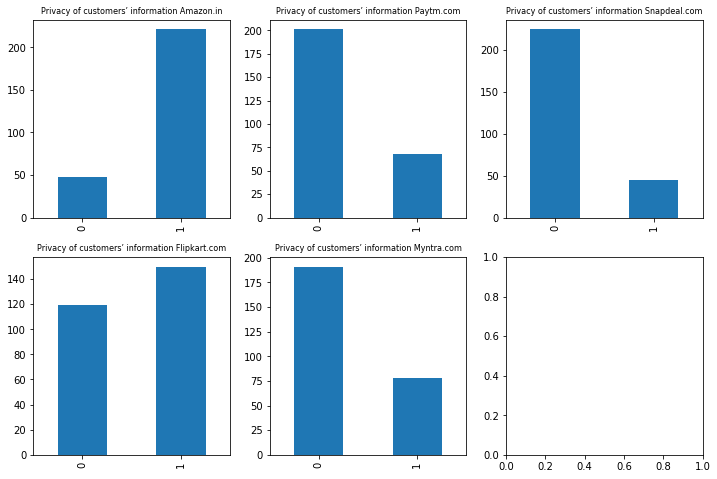

In [45]:
fig, axarr = plt.subplots(2, 3, figsize=(12, 8))
df['Privacy of customers’ information Amazon.in'].value_counts().sort_index().plot.bar(ax=axarr[0][0])
axarr[0][0].set_title("Privacy of customers’ information Amazon.in", fontsize=8)
df['Privacy of customers’ information Paytm.com'].value_counts().sort_index().plot.bar(ax=axarr[0][1])
axarr[0][1].set_title("Privacy of customers’ information Paytm.com", fontsize=8)
df['Privacy of customers’ information Flipkart.com'].value_counts().sort_index().plot.bar(ax=axarr[1][0])
axarr[1][0].set_title("Privacy of customers’ information Flipkart.com", fontsize=8)
df['Privacy of customers’ information Myntra.com'].value_counts().sort_index().plot.bar(ax=axarr[1][1])
axarr[1][1].set_title("Privacy of customers’ information Myntra.com", fontsize=8)
df['Privacy of customers’ information Snapdeal.com'].value_counts().sort_index().plot.bar(ax=axarr[0][2])
axarr[0][2].set_title("Privacy of customers’ information Snapdeal.com", fontsize=8)

Text(0.5, 1.0, 'Security of customer financial information Snapdeal.com')

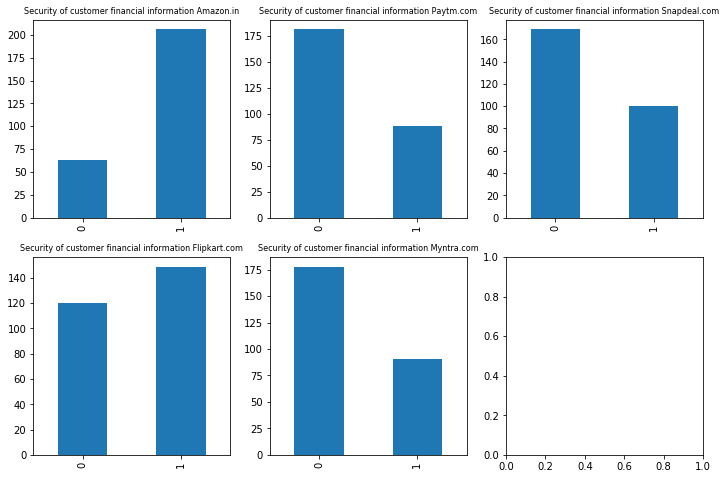

In [46]:
fig, axarr = plt.subplots(2, 3, figsize=(12, 8))
df['Security of customer financial information Amazon.in'].value_counts().sort_index().plot.bar(ax=axarr[0][0])
axarr[0][0].set_title("Security of customer financial information Amazon.in", fontsize=8)
df['Security of customer financial information Paytm.com'].value_counts().sort_index().plot.bar(ax=axarr[0][1])
axarr[0][1].set_title("Security of customer financial information Paytm.com", fontsize=8)
df['Security of customer financial information Flipkart.com'].value_counts().sort_index().plot.bar(ax=axarr[1][0])
axarr[1][0].set_title("Security of customer financial information Flipkart.com", fontsize=8)
df['Security of customer financial information Myntra.com'].value_counts().sort_index().plot.bar(ax=axarr[1][1])
axarr[1][1].set_title("Security of customer financial information Myntra.com", fontsize=8)
df['Security of customer financial information Snapdeal.com'].value_counts().sort_index().plot.bar(ax=axarr[0][2])
axarr[0][2].set_title("Security of customer financial information Snapdeal.com", fontsize=8)

Text(0.5, 1.0, 'Perceived Trustworthiness Snapdeal.com')

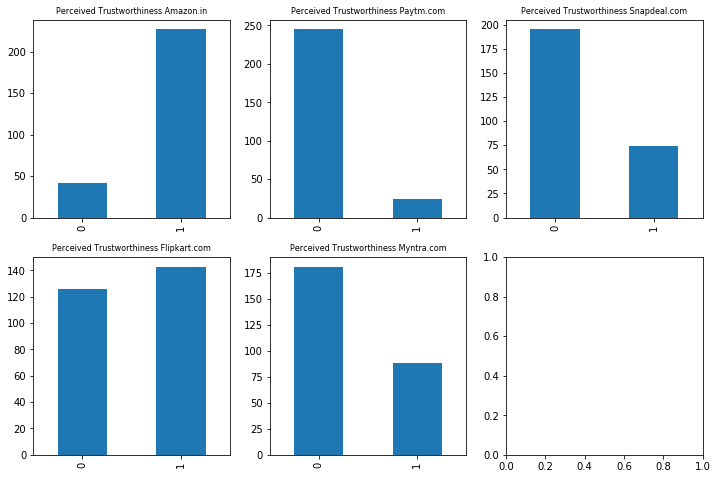

In [47]:
fig, axarr = plt.subplots(2, 3, figsize=(12, 8))
df['Perceived Trustworthiness Amazon.in'].value_counts().sort_index().plot.bar(ax=axarr[0][0])
axarr[0][0].set_title("Perceived Trustworthiness Amazon.in", fontsize=8)
df['Perceived Trustworthiness Paytm.com'].value_counts().sort_index().plot.bar(ax=axarr[0][1])
axarr[0][1].set_title("Perceived Trustworthiness Paytm.com", fontsize=8)
df['Perceived Trustworthiness Flipkart.com'].value_counts().sort_index().plot.bar(ax=axarr[1][0])
axarr[1][0].set_title("Perceived Trustworthiness Flipkart.com", fontsize=8)
df['Perceived Trustworthiness Myntra.com'].value_counts().sort_index().plot.bar(ax=axarr[1][1])
axarr[1][1].set_title("Perceived Trustworthiness Myntra.com", fontsize=8)
df['Perceived Trustworthiness Snapdeal.com'].value_counts().sort_index().plot.bar(ax=axarr[0][2])
axarr[0][2].set_title("Perceived Trustworthiness Snapdeal.com", fontsize=8)

Text(0.5, 1.0, 'Presence of online assistance through multi-channel Snapdeal.com')

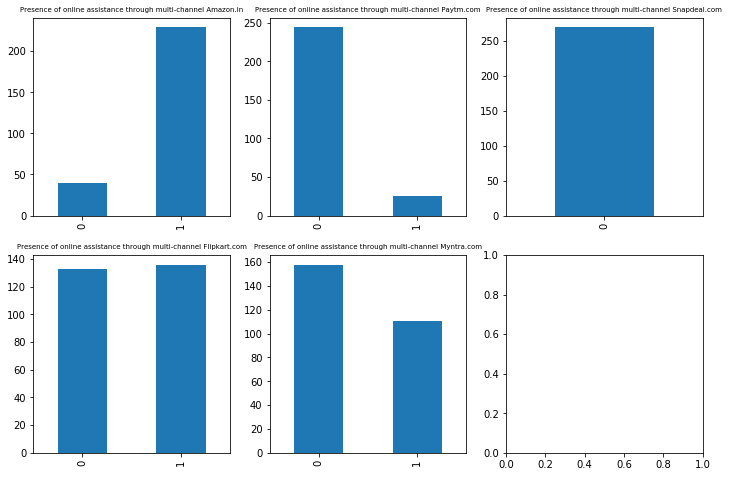

In [50]:
fig, axarr = plt.subplots(2, 3, figsize=(12, 8))
df['Presence of online assistance through multi-channel Amazon.in'].value_counts().sort_index().plot.bar(ax=axarr[0][0])
axarr[0][0].set_title("Presence of online assistance through multi-channel Amazon.in", fontsize=7)
df['Presence of online assistance through multi-channel Paytm.com'].value_counts().sort_index().plot.bar(ax=axarr[0][1])
axarr[0][1].set_title("Presence of online assistance through multi-channel Paytm.com", fontsize=7)
df['Presence of online assistance through multi-channel Flipkart.com'].value_counts().sort_index().plot.bar(ax=axarr[1][0])
axarr[1][0].set_title("Presence of online assistance through multi-channel Flipkart.com", fontsize=7)
df['Presence of online assistance through multi-channel Myntra.com'].value_counts().sort_index().plot.bar(ax=axarr[1][1])
axarr[1][1].set_title("Presence of online assistance through multi-channel Myntra.com", fontsize=7)
df['Presence of online assistance through multi-channel Snapdeal.com'].value_counts().sort_index().plot.bar(ax=axarr[0][2])
axarr[0][2].set_title("Presence of online assistance through multi-channel Snapdeal.com", fontsize=7)